<a href="https://colab.research.google.com/github/goktuggokmen/Visualization-And-Interpretation-of-World-Happiness-Index-Data/blob/main/Uygulama_4_Dunya_Mutluluk_Endeksi_Verilerinin_Gorsellestirilmesi_ve_Yorumlanmasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EEM 314 Veri Madenciliğine Giriş**
#**Uygulama 4 : Dünya Mutluluk Endeksi Verilerinin Görselleştirilmesi ve Yorumlanması**

# **1. Kullanılacak Kütüphanelerin Yüklenmesi**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **2.Verilerin Dosyadan Okunması Ve Kolonların Anlamlandırılması**

In [ ]:
#2021 yılı verileri
data1 = pd.read_csv("/content/world-happiness-report-2021.csv")
#Diğer yıllara ait veriler.
data2= pd.read_csv("/content/world-happiness-report.csv")

In [ ]:
data1.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [ ]:
data2.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

Country name : Ülke adı

year : Sene

Regional indicator : Bölge adı

Ladder score : Mutluluk puanı

Standard error of ladder score : Mutluluk puanındaki standart hata

upperwhisker : Max. değer

lowerwhisker : Min. değer

Logged GDP per capita : Kişi başına düşen GSYİH (Gayri safi yurt içi hasıla)

Social support : Sosyal destek

Healthy life expectancy : Ortalama sağlıklı yaşam süresi

Freedom to make life choices : Yaşam tarzını belirleme özgürlüğü

Generosity : Cömertlik

Perceptions of corruption : Yolsuzluk algıları

Ladder score in Dystopia : Distopide mutluluk puanı 

Explained by: Log GDP per capita : Açıklanan kişi başına düşen GSYİH (Gayri safi yurt içi hasıla) 

Explained by: Social support : Açıklanan sosyal destek

Explained by: Healthy life expectancy : Açıklanan ortalama sağlıklı yaşam süresi

Explained by: Freedom to make life choices : Açıklanan yaşam tarzını belirleme özgürlüğü

Explained by: Generosity : Açıklanan cömertlik puanı

Explained by: Perceptions of corruption : Açıklanan yolsuzluk algısı puanı

Dystopia + residual : Distopya + kalıcı durum

Positive affect : Olumlu etki

Negative affect : Olumsuz etki







# **3.Verilerin Analiz Edilmesi**

# 3.a. 2021 yılına ait verilerin analizi

Mutluluk puanlarına ait histogram grafiği

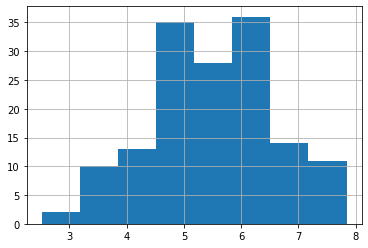

In [ ]:
data1['Ladder score'].hist(bins=8)

2021 yılı verilerinde yığılmanın 4.5-6.5 puan arasında olduğu görülmektedir.

Bölge-Mutluluk puanı kutu grafiği

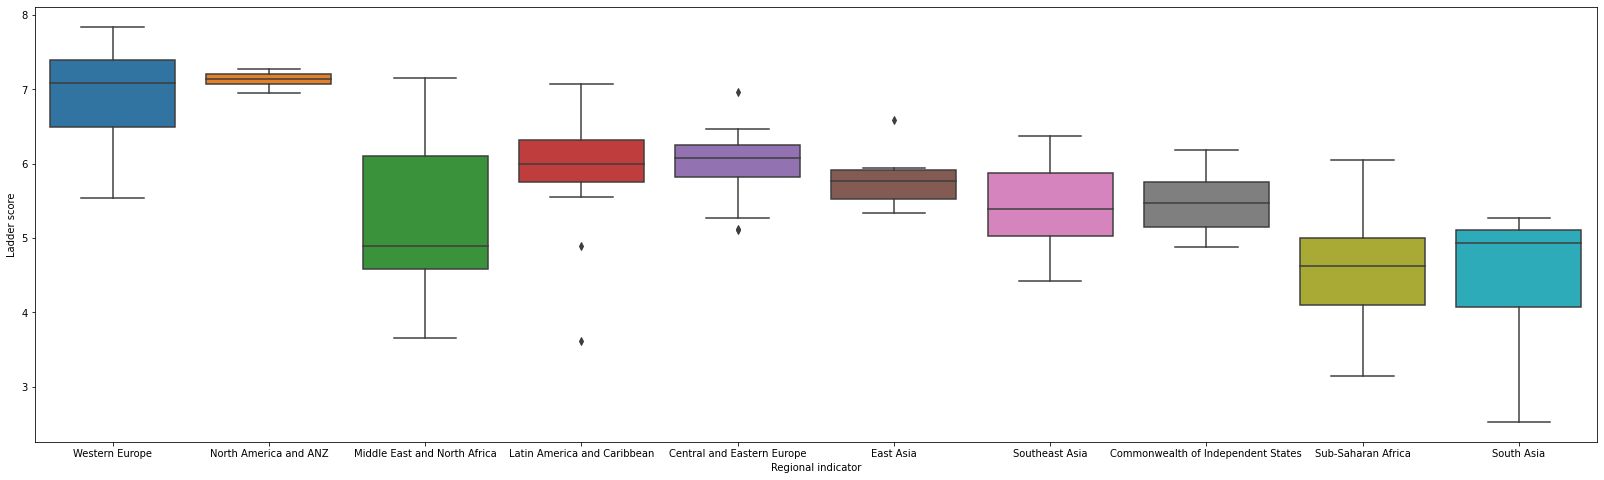

In [ ]:
plt.figure(figsize=(28, 8))
sns.boxplot(x = 'Regional indicator', y = 'Ladder score', data = data1)

Bölge-mutluluk puanı serpilme diyagramı

Text(0.5, 1.0, 'Scatter plot: Regional indicator')

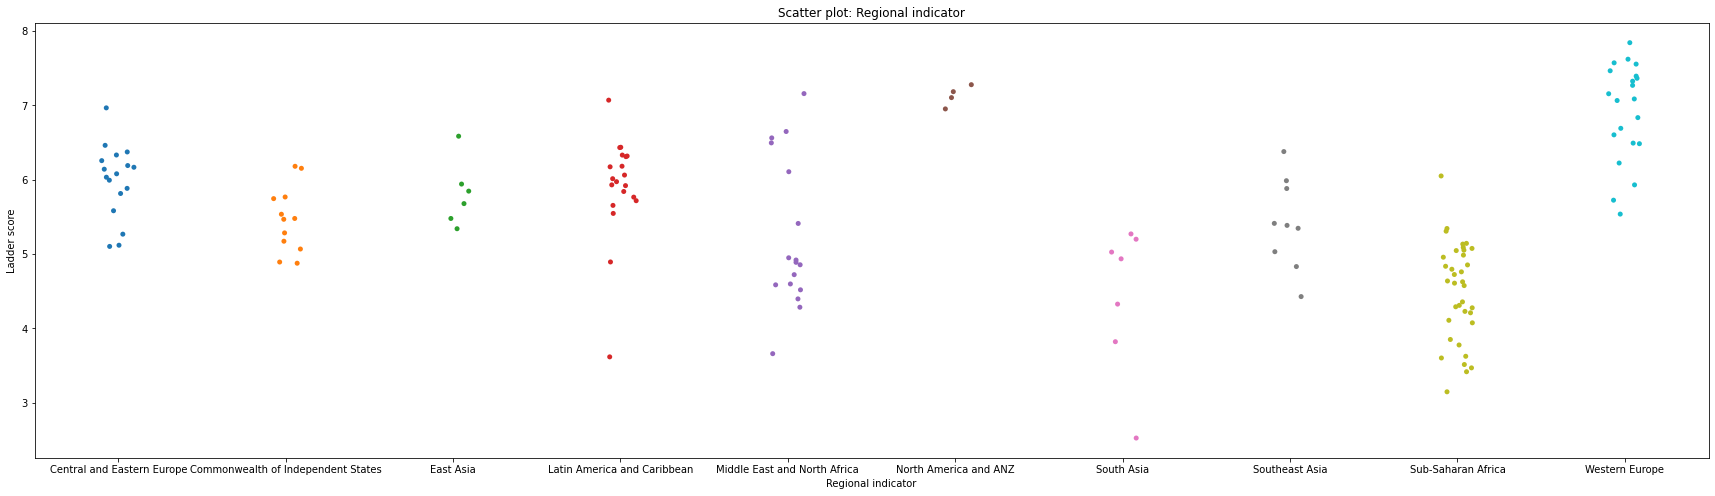

In [ ]:
plt.figure(figsize=(30, 8))
sns.stripplot(x="Regional indicator", y="Ladder score", data=data1)
plt.title("Scatter plot: Regional indicator")

Bölgelerin mutluluk puanlarını görsel olarak inceledik şimdi de sayısal olarak bakalım ...

In [ ]:
data_sub = data1[['Regional indicator','Ladder score']]
data_group = data_sub.groupby(['Regional indicator'], as_index = False).mean()
data_group

,Regional indicator,Ladder score
0,Central and Eastern Europe,5.984765
1,Commonwealth of Independent States,5.467000
2,East Asia,5.810333
3,Latin America and Caribbean,5.908050
4,Middle East and North Africa,5.219765
5,North America and ANZ,7.128500
6,South Asia,4.441857
7,Southeast Asia,5.407556
8,Sub-Saharan Africa,4.494472
9,Western Europe,6.914905


Mutluluk puanınının diğer değişkenlerle ilişkisini görebilmek için serpilme diyagramı çizdiriyoruz

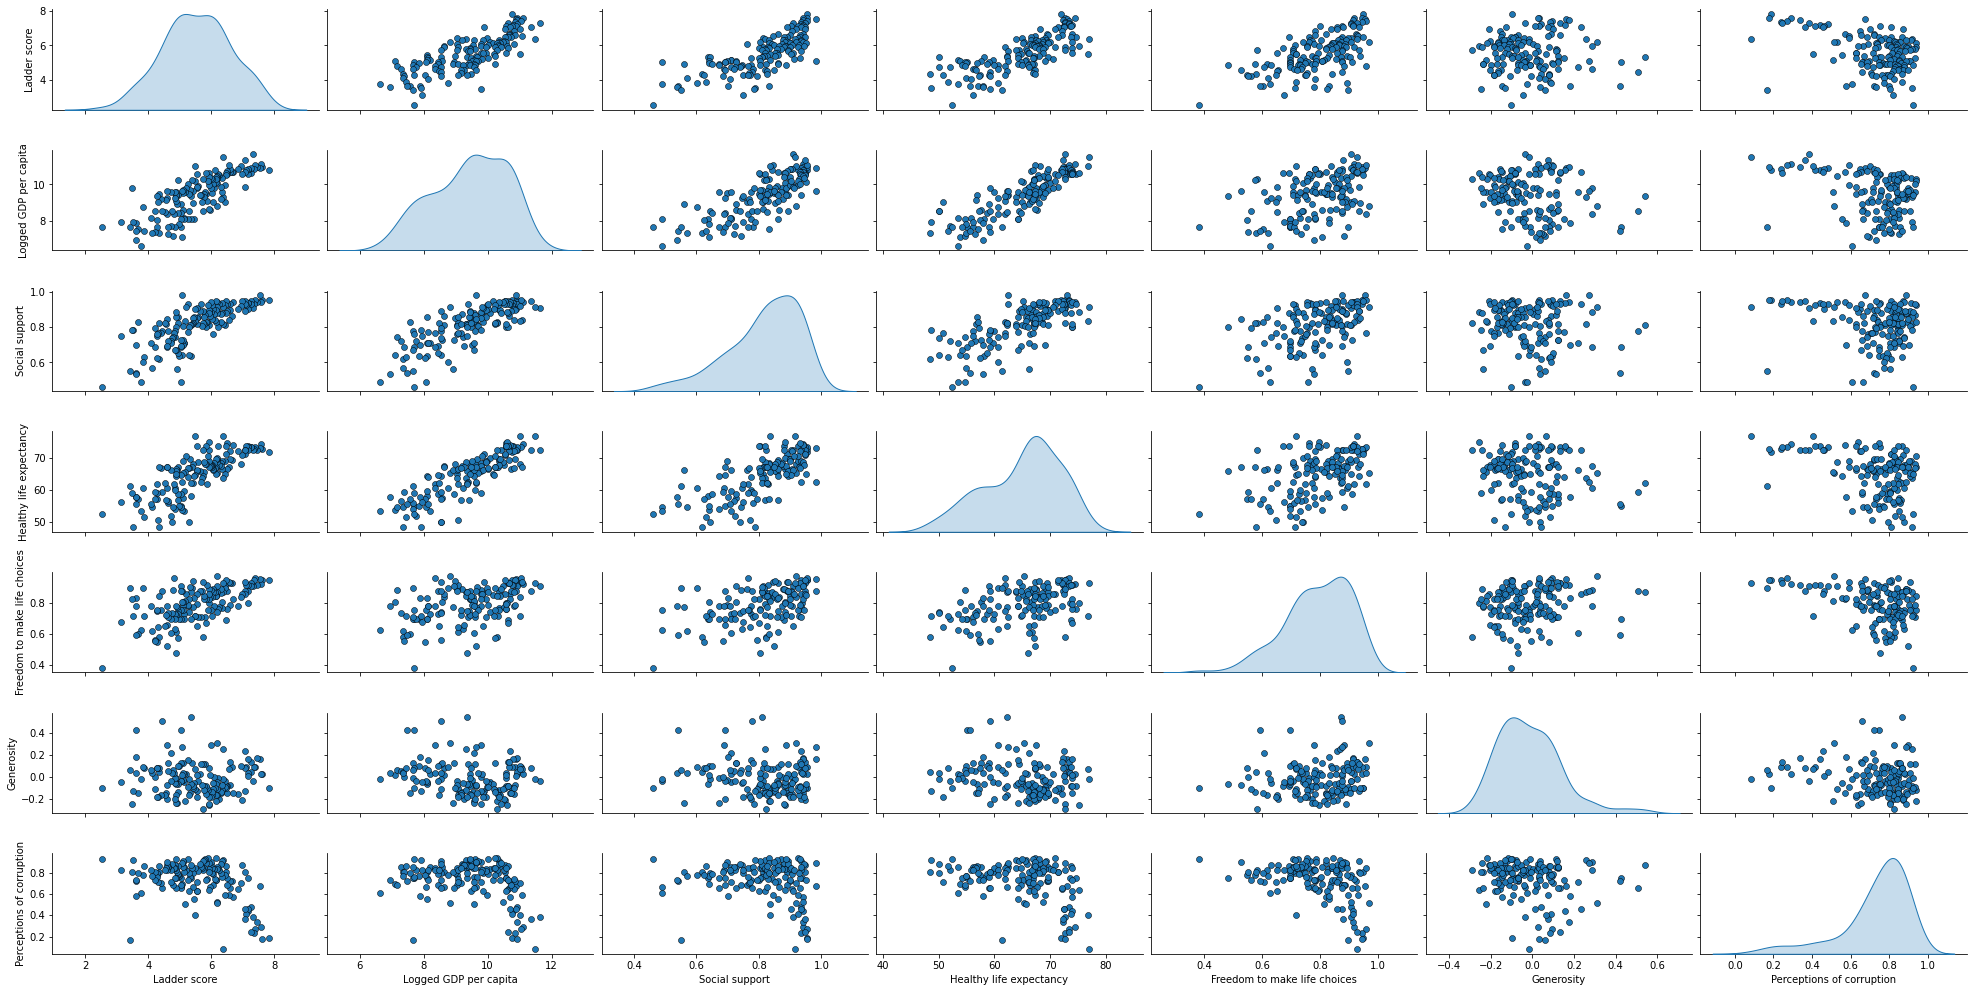

In [ ]:
ozellikler = ['Ladder score','Logged GDP per capita', 'Social support', 'Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']
pp = sns.pairplot(data1[ozellikler], height=2, aspect=2,plot_kws=dict(edgecolor="k", linewidth=0.5),diag_kind="kde", diag_kws=dict(shade=True))

# 3.b. 2021 yılı itibari ile mutluluk puanı en düşük ve en yüksek olan ülkelerin tespit edilmesi

In [ ]:
#Mutluluk puanı en düşük 5 ülke 
data1.sort_values(by = 'Ladder score',ascending=True).head(3)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
148,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,-0.102,0.924,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095


In [ ]:
#Mutluluk puanı en yüksek 5 ülke 
data1.sort_values(by = 'Ladder score',ascending=False).head(3)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839


# **3.c. Mutluluk puanı en düşük ve en yüksek ülkelerin önceki yıllara ait verilerinin analizi**

In [ ]:
#Mutluluk puanı düşük ülkelerden başlayalım
#Afganistan ile başlayalım
data_afg = data2[data2['Country name'].isin(['Afghanistan'])]
data_afg

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
5,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
6,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375
7,Afghanistan,2015,3.983,7.702,0.529,53.20,0.389,0.080,0.881,0.554,0.339
8,Afghanistan,2016,4.220,7.697,0.559,53.00,0.523,0.042,0.793,0.565,0.348
9,Afghanistan,2017,2.662,7.697,0.491,52.80,0.427,-0.121,0.954,0.496,0.371


In [ ]:
#Korelasyon analizi 
data_afg.corr()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,1.000000,-0.727909,0.698488,-0.251446,0.796539,-0.886808,-0.869276,0.570386,-0.649932,0.902027
Life Ladder,-0.727909,1.000000,-0.296470,0.674437,-0.384955,0.624398,0.748900,-0.769950,0.734691,-0.778236
Log GDP per capita,0.698488,-0.296470,1.000000,0.201749,0.867096,-0.722392,-0.425047,0.011397,-0.001576,0.480300
Social support,-0.251446,0.674437,0.201749,1.000000,0.152544,0.128997,0.426251,-0.513682,0.594615,-0.450371
Healthy life expectancy at birth,0.796539,-0.384955,0.867096,0.152544,1.000000,-0.793214,-0.520273,0.270283,-0.169529,0.572235
Freedom to make life choices,-0.886808,0.624398,-0.722392,0.128997,-0.793214,1.000000,0.700418,-0.407962,0.485800,-0.769473
Generosity,-0.869276,0.748900,-0.425047,0.426251,-0.520273,0.700418,1.000000,-0.673187,0.801349,-0.832701
Perceptions of corruption,0.570386,-0.769950,0.011397,-0.513682,0.270283,-0.407962,-0.673187,1.000000,-0.763544,0.619480
Positive affect,-0.649932,0.734691,-0.001576,0.594615,-0.169529,0.485800,0.801349,-0.763544,1.000000,-0.840244
Negative affect,0.902027,-0.778236,0.480300,-0.450371,0.572235,-0.769473,-0.832701,0.619480,-0.840244,1.000000


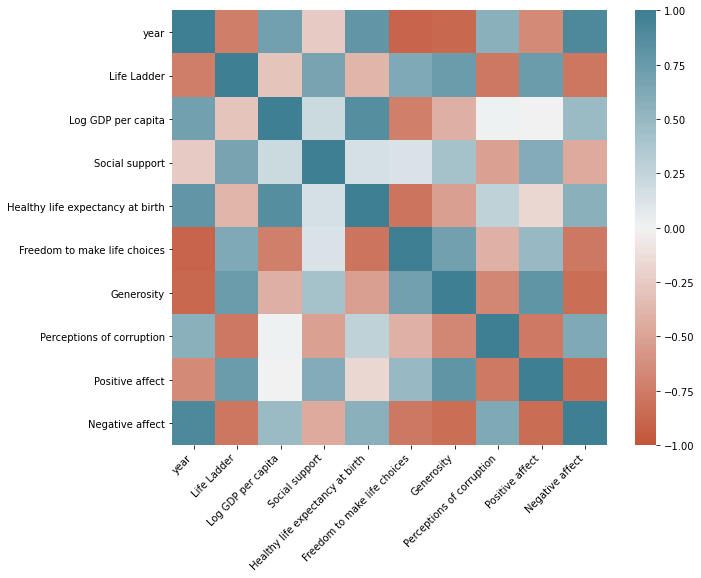

In [ ]:
corr = data_afg.corr()
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');

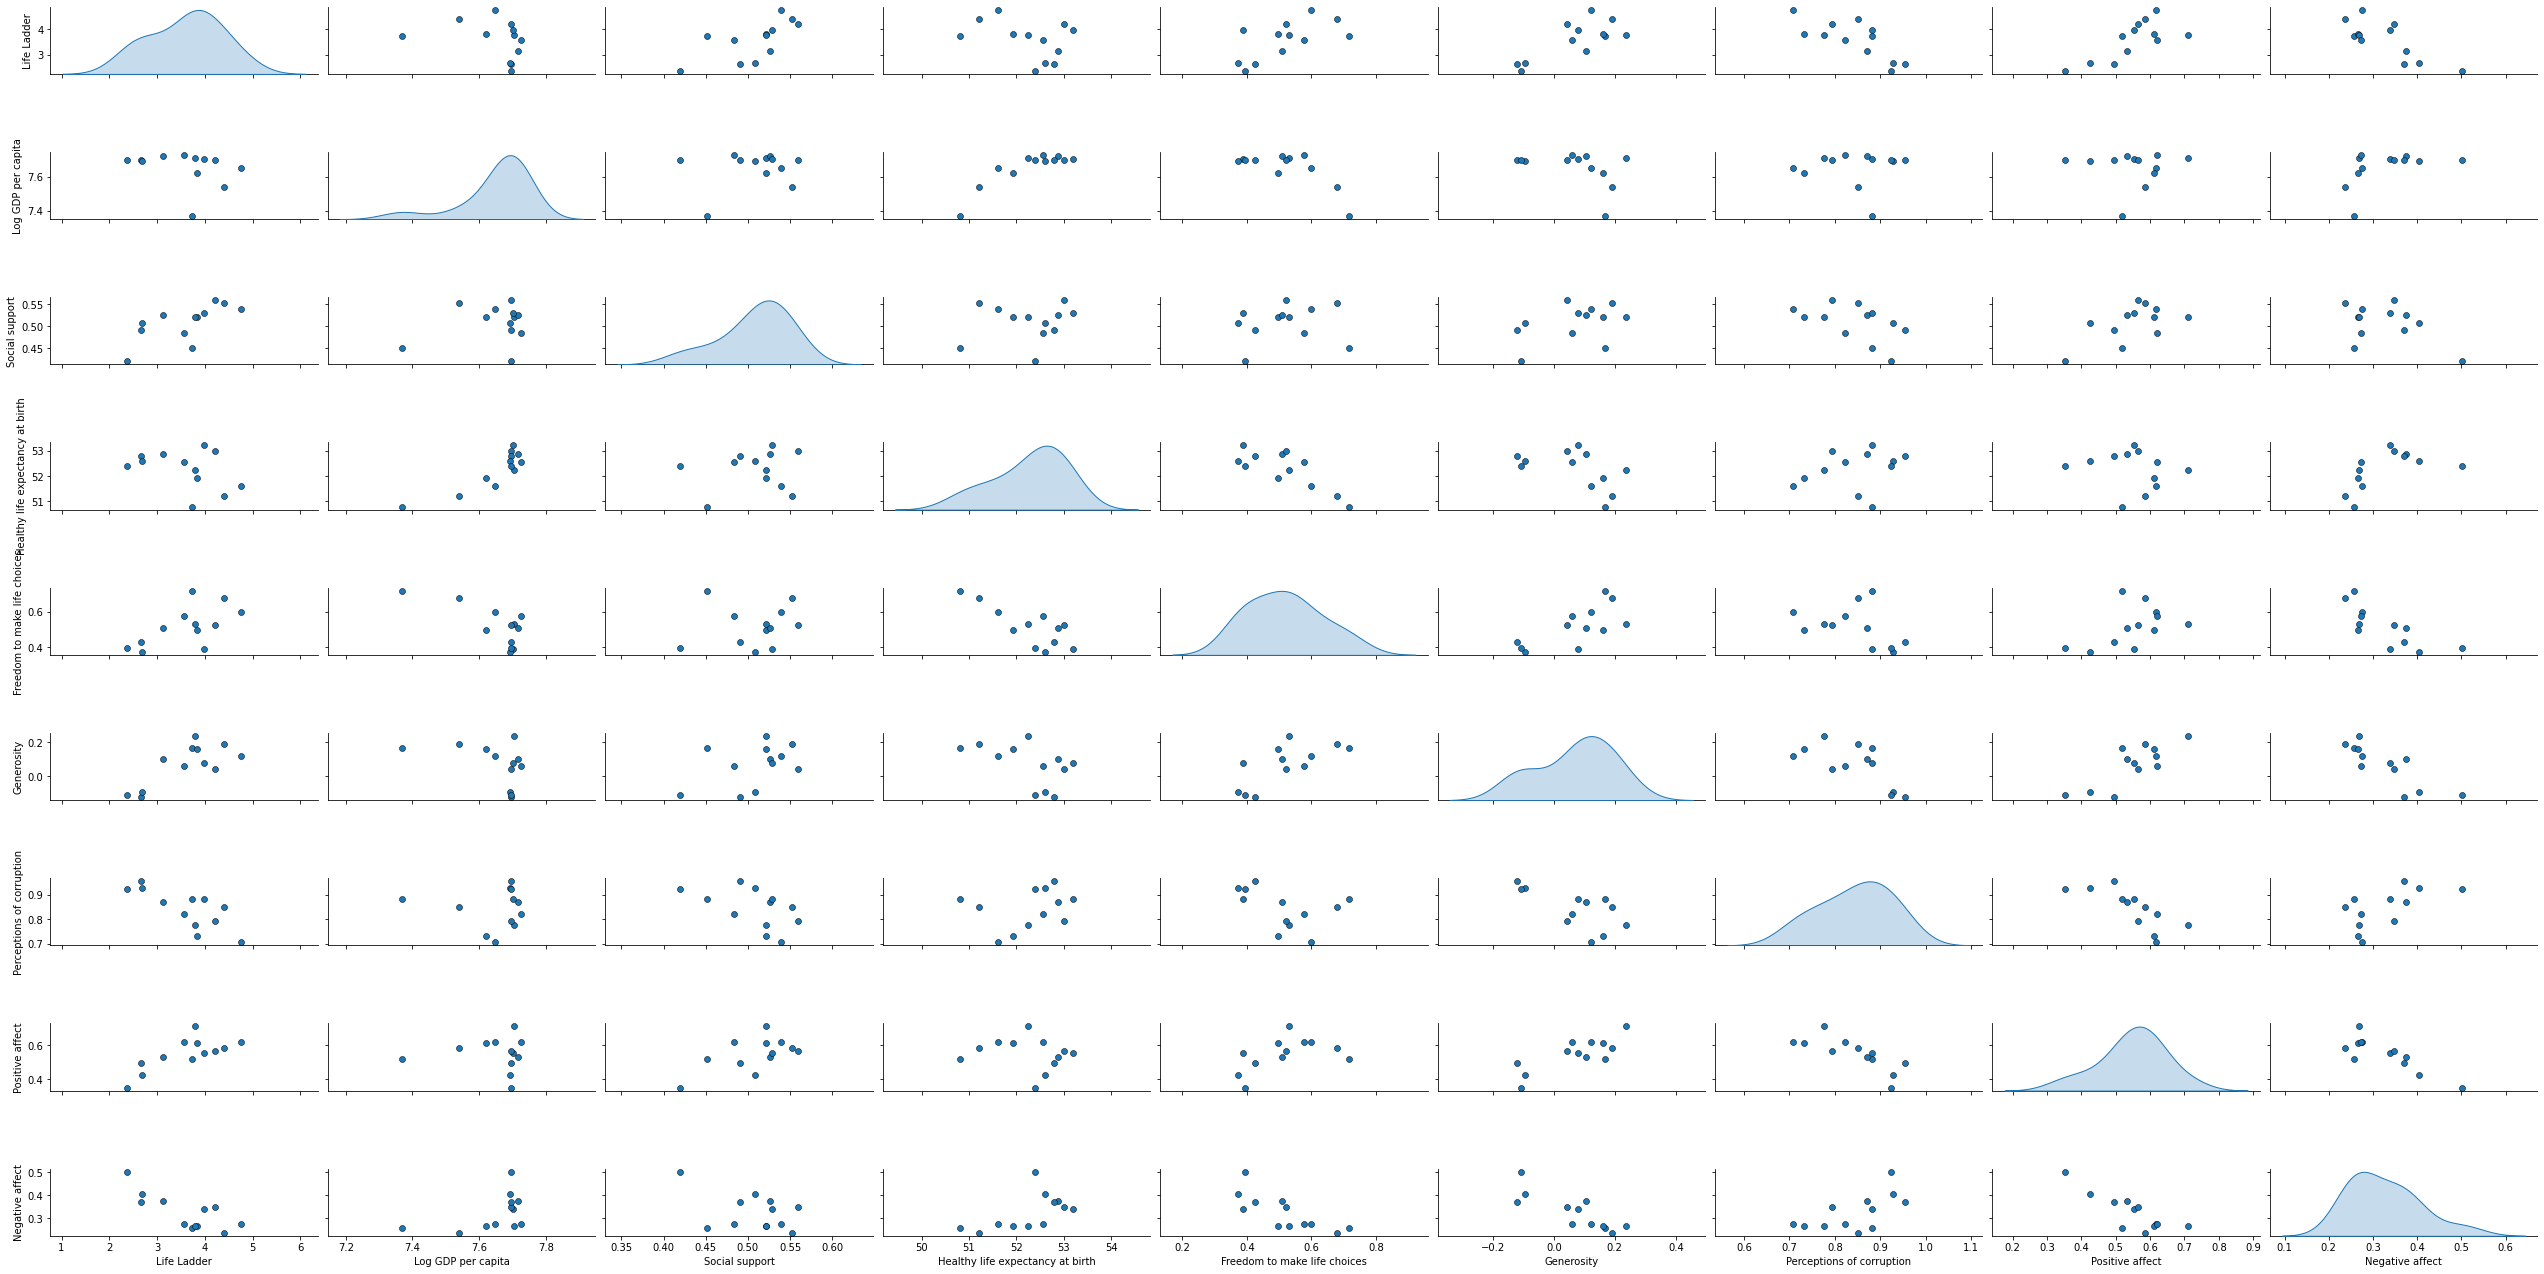

In [ ]:
#Pair plot
ozellikler = ['Life Ladder','Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices','Generosity','Perceptions of corruption','Positive affect','Negative affect']
pp = sns.pairplot(data_afg[ozellikler], height=2, aspect=2,plot_kws=dict(edgecolor="k", linewidth=0.5),diag_kind="kde", diag_kws=dict(shade=True))

Afganistan için analizler :
1. Korelasyon analizinden Afganistan'da yıllar geçtikçe mutluluk puanının çok 
güçlü negatif korelasyonla değiştiğini görüyoruz,yüksek düzeyde korelasyon.
2. Korelasyon analizinden Afganistan'da mutluluk puanı ile GSYİH'in negatif korole olduğunu görüyoruz fakat aralarında güçlü bir bağlantı yok yani düşük sayılabilecek düzeyde bir korelasyon var.Anlamlı bir veri çıkartılamaz.
3. Korelasyon analizinden Afganistan'da mutluluk puanı ile sosyal yardımlar arasında güçlü sayılabilecek bir pozitif korelasyon mevcut.
4. Korelasyon analizinden Afganistan'da mutluluk puanı ile ortalama sağlıklı yaşam süresi arasında zayıf bir negatif korelasyon var,burdan anlamlı bir analiz çıkacağını düşünmüyorum.
5. Korelasyon analizinden Afganistan'da mutluluk puanı ile yaşam tarzını belirleme özgürlüğü arasında orta düzeyde bir pozitif korelasyon var.
6. Korelasyon analizinden Afganistan'da mutluluk puanı ile cömertlik arasında çok güçlü bir pozitif korelasyon var.
7. Korelasyon analizinden Afganistan'da mutluluk puanı ile yolsuzluk algıları arasında çok güçlü bir negatif korelasyon var.
8. Öngörülebieceği gibi mutluluk puanı ile negatif etki arasında negatif ve pozitif etki arasında pozitif güçlü korelasyon bulunmaktadır.


In [ ]:
#Zimbabwe
data_zim = data2[data2['Country name'].isin(['Zimbabwe'])]
data_zim

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1934,Zimbabwe,2006,3.826,7.711,0.822,41.58,0.431,-0.076,0.905,0.715,0.297
1935,Zimbabwe,2007,3.280,7.666,0.828,42.86,0.456,-0.082,0.946,0.661,0.265
1936,Zimbabwe,2008,3.174,7.461,0.843,44.14,0.344,-0.090,0.964,0.631,0.250
1937,Zimbabwe,2009,4.056,7.563,0.806,45.42,0.411,-0.078,0.931,0.736,0.218
1938,Zimbabwe,2010,4.682,7.729,0.857,46.70,0.665,-0.093,0.828,0.748,0.122
1939,Zimbabwe,2011,4.846,7.846,0.865,48.12,0.633,-0.088,0.830,0.781,0.211
1940,Zimbabwe,2012,4.955,7.983,0.896,49.54,0.470,-0.103,0.859,0.669,0.177
1941,Zimbabwe,2013,4.690,7.985,0.799,50.96,0.576,-0.104,0.831,0.712,0.182
1942,Zimbabwe,2014,4.184,7.991,0.766,52.38,0.642,-0.074,0.820,0.725,0.239
1943,Zimbabwe,2015,3.703,7.992,0.736,53.80,0.667,-0.123,0.810,0.715,0.179


In [ ]:
#Korelasyon analizi 
data_zim.corr()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,1.000000,-0.317866,0.725278,-0.726564,0.989385,0.773738,0.348873,-0.753635,0.296682,0.076600
Life Ladder,-0.317866,1.000000,0.168829,0.599875,-0.237044,0.000742,-0.455048,-0.094103,0.287407,-0.609610
Log GDP per capita,0.725278,0.168829,1.000000,-0.408237,0.786445,0.784687,-0.141142,-0.779189,0.396300,-0.260233
Social support,-0.726564,0.599875,-0.408237,1.000000,-0.715546,-0.545746,-0.369172,0.521831,-0.232921,-0.380879
Healthy life expectancy at birth,0.989385,-0.237044,0.786445,-0.715546,1.000000,0.804157,0.232328,-0.796922,0.326353,-0.016096
Freedom to make life choices,0.773738,0.000742,0.784687,-0.545746,0.804157,1.000000,0.038751,-0.879016,0.639580,-0.245038
Generosity,0.348873,-0.455048,-0.141142,-0.369172,0.232328,0.038751,1.000000,-0.000450,-0.097345,0.752600
Perceptions of corruption,-0.753635,-0.094103,-0.779189,0.521831,-0.796922,-0.879016,-0.000450,1.000000,-0.638060,0.176940
Positive affect,0.296682,0.287407,0.396300,-0.232921,0.326353,0.639580,-0.097345,-0.638060,1.000000,-0.245955
Negative affect,0.076600,-0.609610,-0.260233,-0.380879,-0.016096,-0.245038,0.752600,0.176940,-0.245955,1.000000


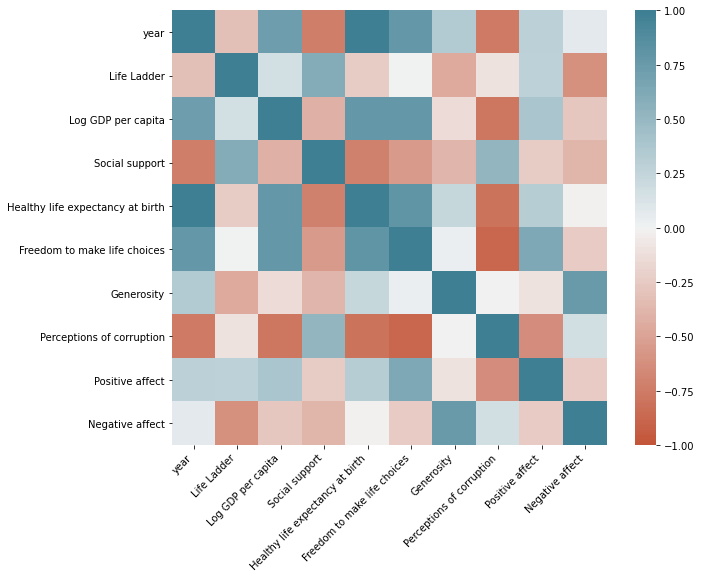

In [ ]:
#Korelasyon grafiği
corr = data_zim.corr()
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');

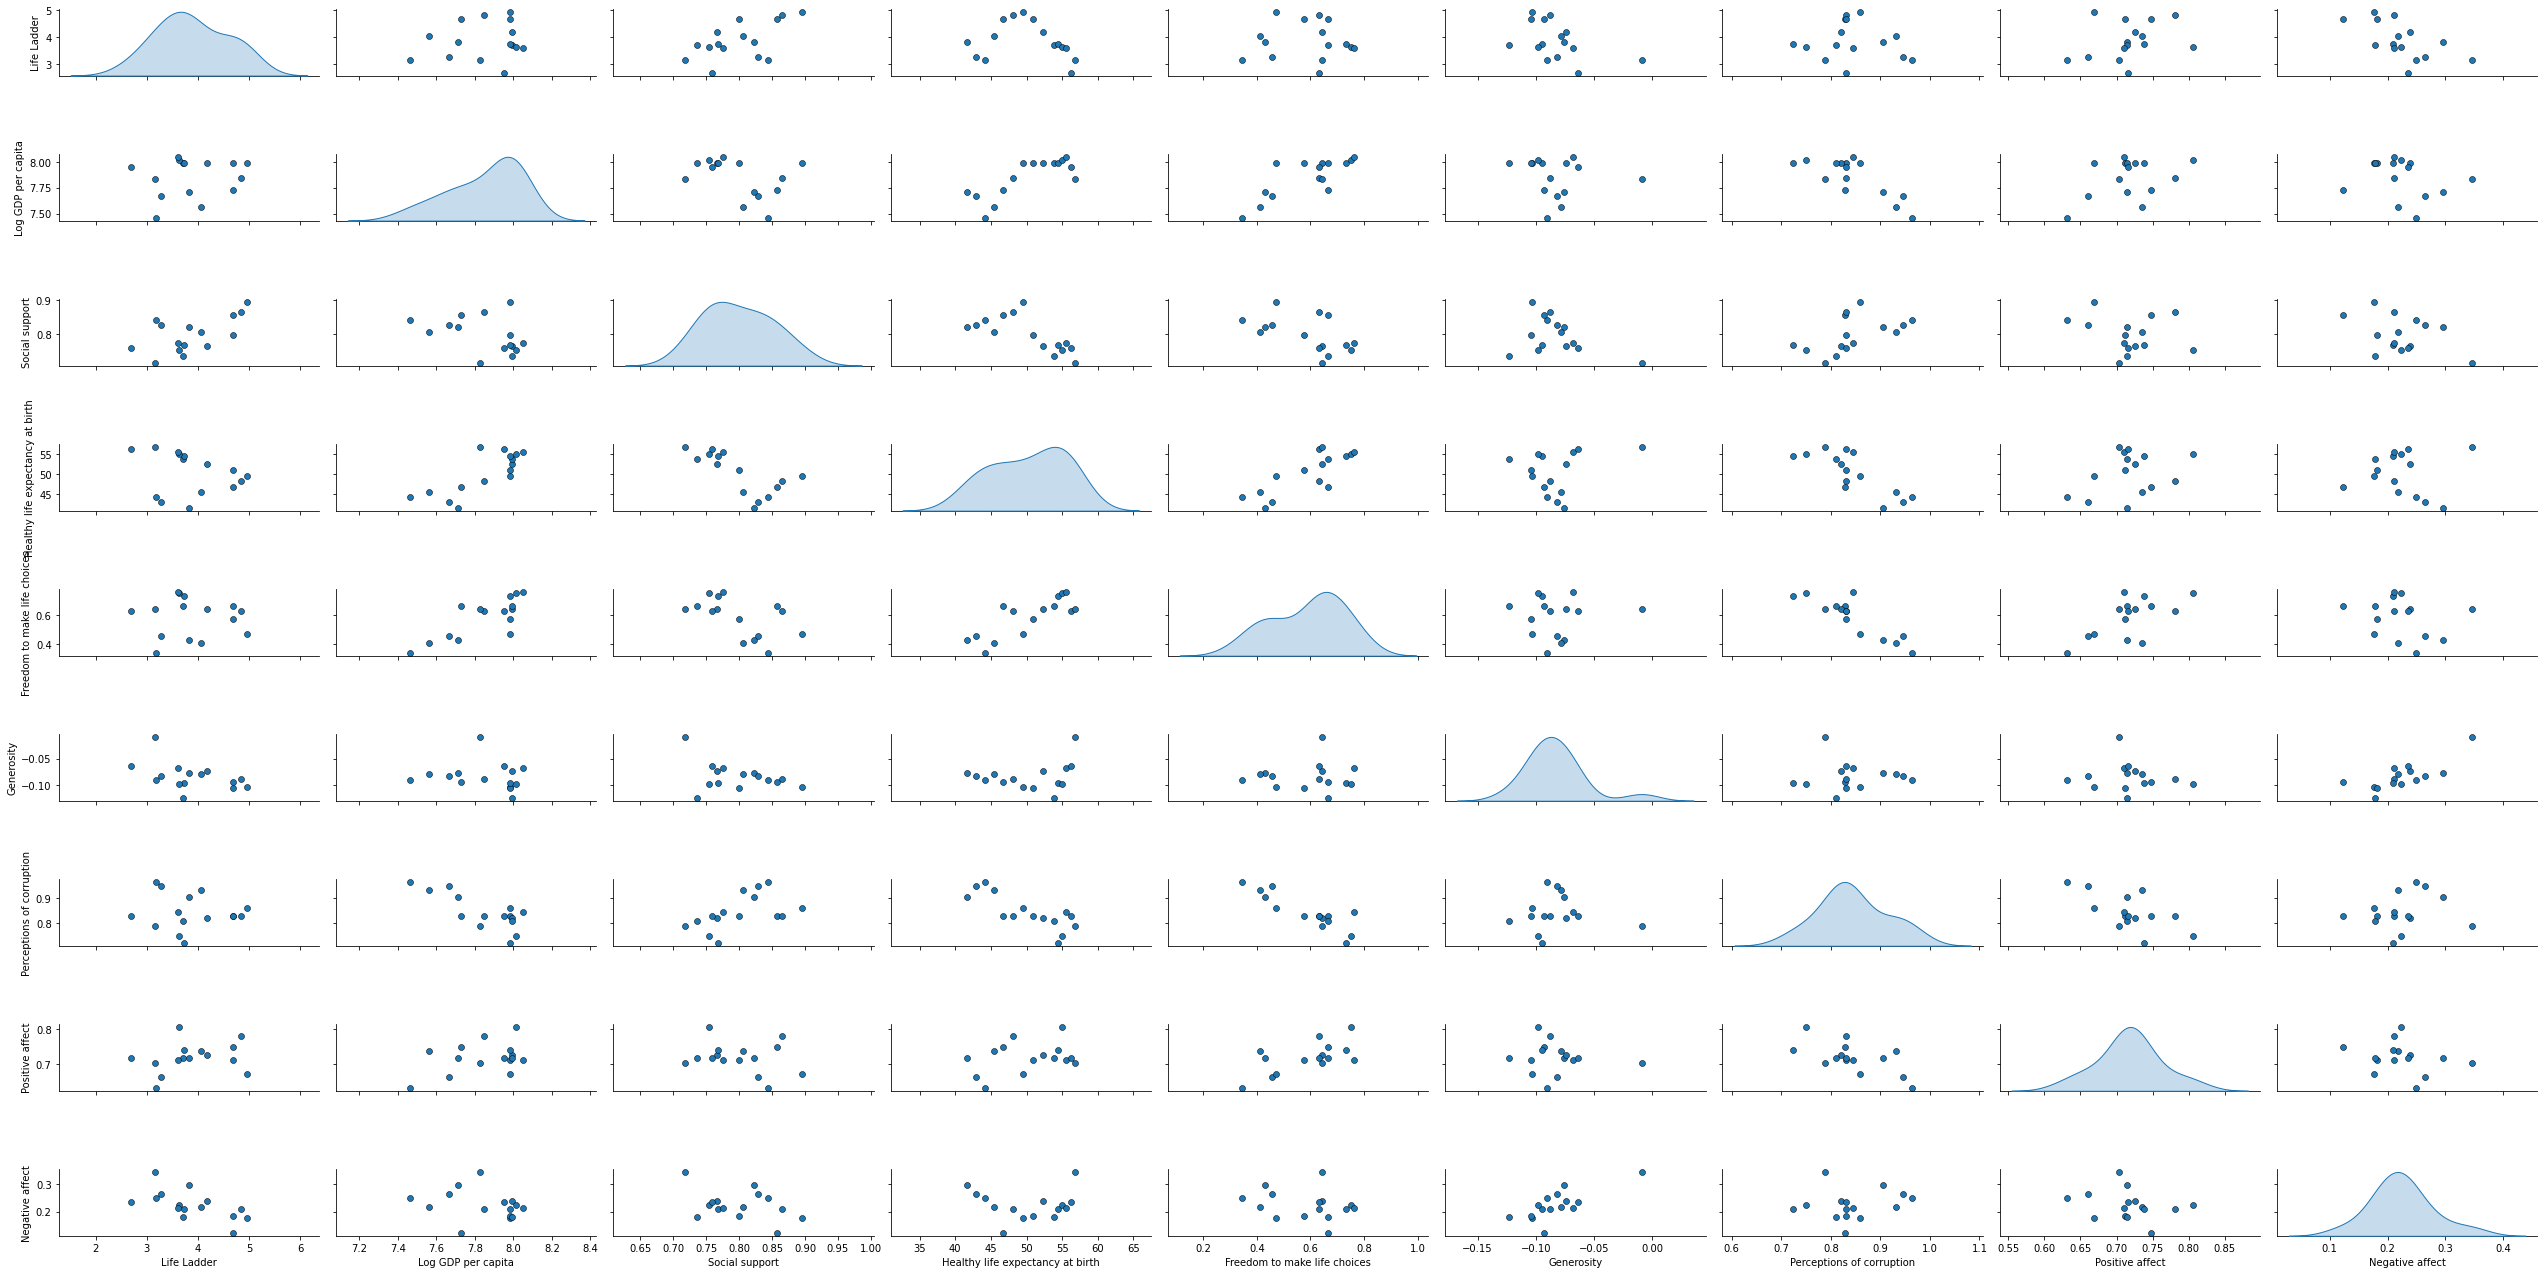

In [ ]:
#Pair plot
ozellikler = ['Life Ladder','Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices','Generosity','Perceptions of corruption','Positive affect','Negative affect']
pp = sns.pairplot(data_zim[ozellikler], height=2, aspect=2,plot_kws=dict(edgecolor="k", linewidth=0.5),diag_kind="kde", diag_kws=dict(shade=True))

Zimbabwe için analizler :
1. Korelasyon analizinden Zimbabwe'de yıllar geçtikçe mutluluk puanının düşük bir negatif korelasyonla değiştiğini görüyoruz,düşük düzeyde korelasyon.
2. Korelasyon analizinden Zimbabwe'de mutluluk puanı ile GSYİH'in pozitif korole olduğunu görüyoruz fakat aralarında güçlü bir bağlantı yok.
3. Korelasyon analizinden Zimbabwe'de mutluluk puanı ile sosyal yardımlar arasında orta düzeyde bir pozitif korelasyon mevcut.
4. Korelasyon analizinden Zimbabwe'de mutluluk puanı ile ortalama sağlıklı yaşam süresi arasında zayıf bir negatif korelasyon var,buradan anlamlı bir çıkarım yapılamaz.
5. Korelasyon analizinden Zimbabwe'de mutluluk puanı ile yaşam tarzı arasında bir ilişki yok.
6. Korelasyon analizinden Zimbabwe'de mutluluk puanı ile cömertlik arasında orta düzeyde negatif korelasyon var.
7. Korelasyon analizinden Zimbabwe'de mutluluk puanı ile yolsuzluk algıları arasında çok düşük düzeyde bir negatif korelasyon var.Anlamlı bir ilişki ortaya çıkmaz.
8. Mutluluk puanı ile negatif etki arasında negatif güçlü sayılabilecek bir korelasyon ve pozitif etki arasında pozitif fakat zayıf bir korelasyon bulunmaktadır.

In [ ]:
#Ruanda
data_rwa = data2[data2['Country name'].isin(['Rwanda'])]
data_rwa

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1455,Rwanda,2006,4.215,7.111,0.718,49.88,0.915,NaN,0.299,0.735,0.189
1456,Rwanda,2008,4.363,7.239,0.486,53.04,0.752,0.017,0.286,0.643,0.221
1457,Rwanda,2009,4.030,7.273,0.559,54.62,0.766,-0.001,0.410,0.678,0.112
1458,Rwanda,2011,4.097,7.369,0.570,56.82,0.829,-0.039,0.161,0.665,0.154
1459,Rwanda,2012,3.333,7.428,0.637,57.44,0.835,-0.012,0.081,0.703,0.132
1460,Rwanda,2013,3.466,7.449,0.750,58.06,0.904,-0.028,0.117,0.760,0.167
1461,Rwanda,2014,3.596,7.484,0.748,58.68,0.894,-0.023,0.078,0.763,0.134
1462,Rwanda,2015,3.483,7.544,0.678,59.30,0.908,0.025,0.095,0.721,0.206
1463,Rwanda,2016,3.333,7.576,0.665,59.90,0.911,0.025,0.159,0.752,0.285
1464,Rwanda,2017,3.108,7.588,0.517,60.50,0.908,0.051,0.214,0.762,0.358


In [ ]:
#Korelasyon analizi 
data_rwa.corr()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,1.000000,-0.848342,0.995292,-0.121947,0.975781,0.540416,0.677964,-0.551136,0.650321,0.705490
Life Ladder,-0.848342,1.000000,-0.848898,-0.091019,-0.849546,-0.581268,-0.416162,0.606779,-0.664546,-0.498093
Log GDP per capita,0.995292,-0.848898,1.000000,-0.128043,0.986090,0.492369,0.659175,-0.586063,0.597899,0.669301
Social support,-0.121947,-0.091019,-0.128043,1.000000,-0.101671,0.568933,-0.502805,-0.436616,0.468344,-0.496398
Healthy life expectancy at birth,0.975781,-0.849546,0.986090,-0.101671,1.000000,0.448122,0.558599,-0.612437,0.562381,0.566830
Freedom to make life choices,0.540416,-0.581268,0.492369,0.568933,0.448122,1.000000,0.296879,-0.530368,0.890108,0.370212
Generosity,0.677964,-0.416162,0.659175,-0.502805,0.558599,0.296879,1.000000,0.158360,0.378927,0.886177
Perceptions of corruption,-0.551136,0.606779,-0.586063,-0.436616,-0.612437,-0.530368,0.158360,1.000000,-0.424352,-0.054239
Positive affect,0.650321,-0.664546,0.597899,0.468344,0.562381,0.890108,0.378927,-0.424352,1.000000,0.420050
Negative affect,0.705490,-0.498093,0.669301,-0.496398,0.566830,0.370212,0.886177,-0.054239,0.420050,1.000000


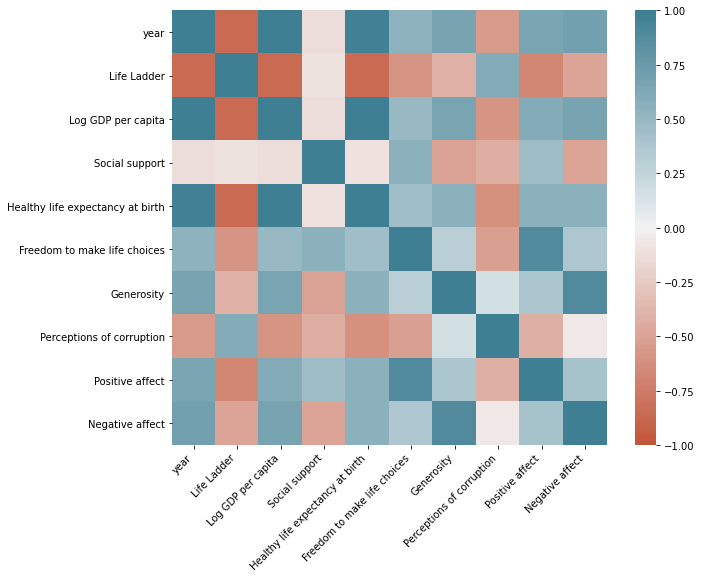

In [ ]:
#Korelasyon grafiği
corr = data_rwa.corr()
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');

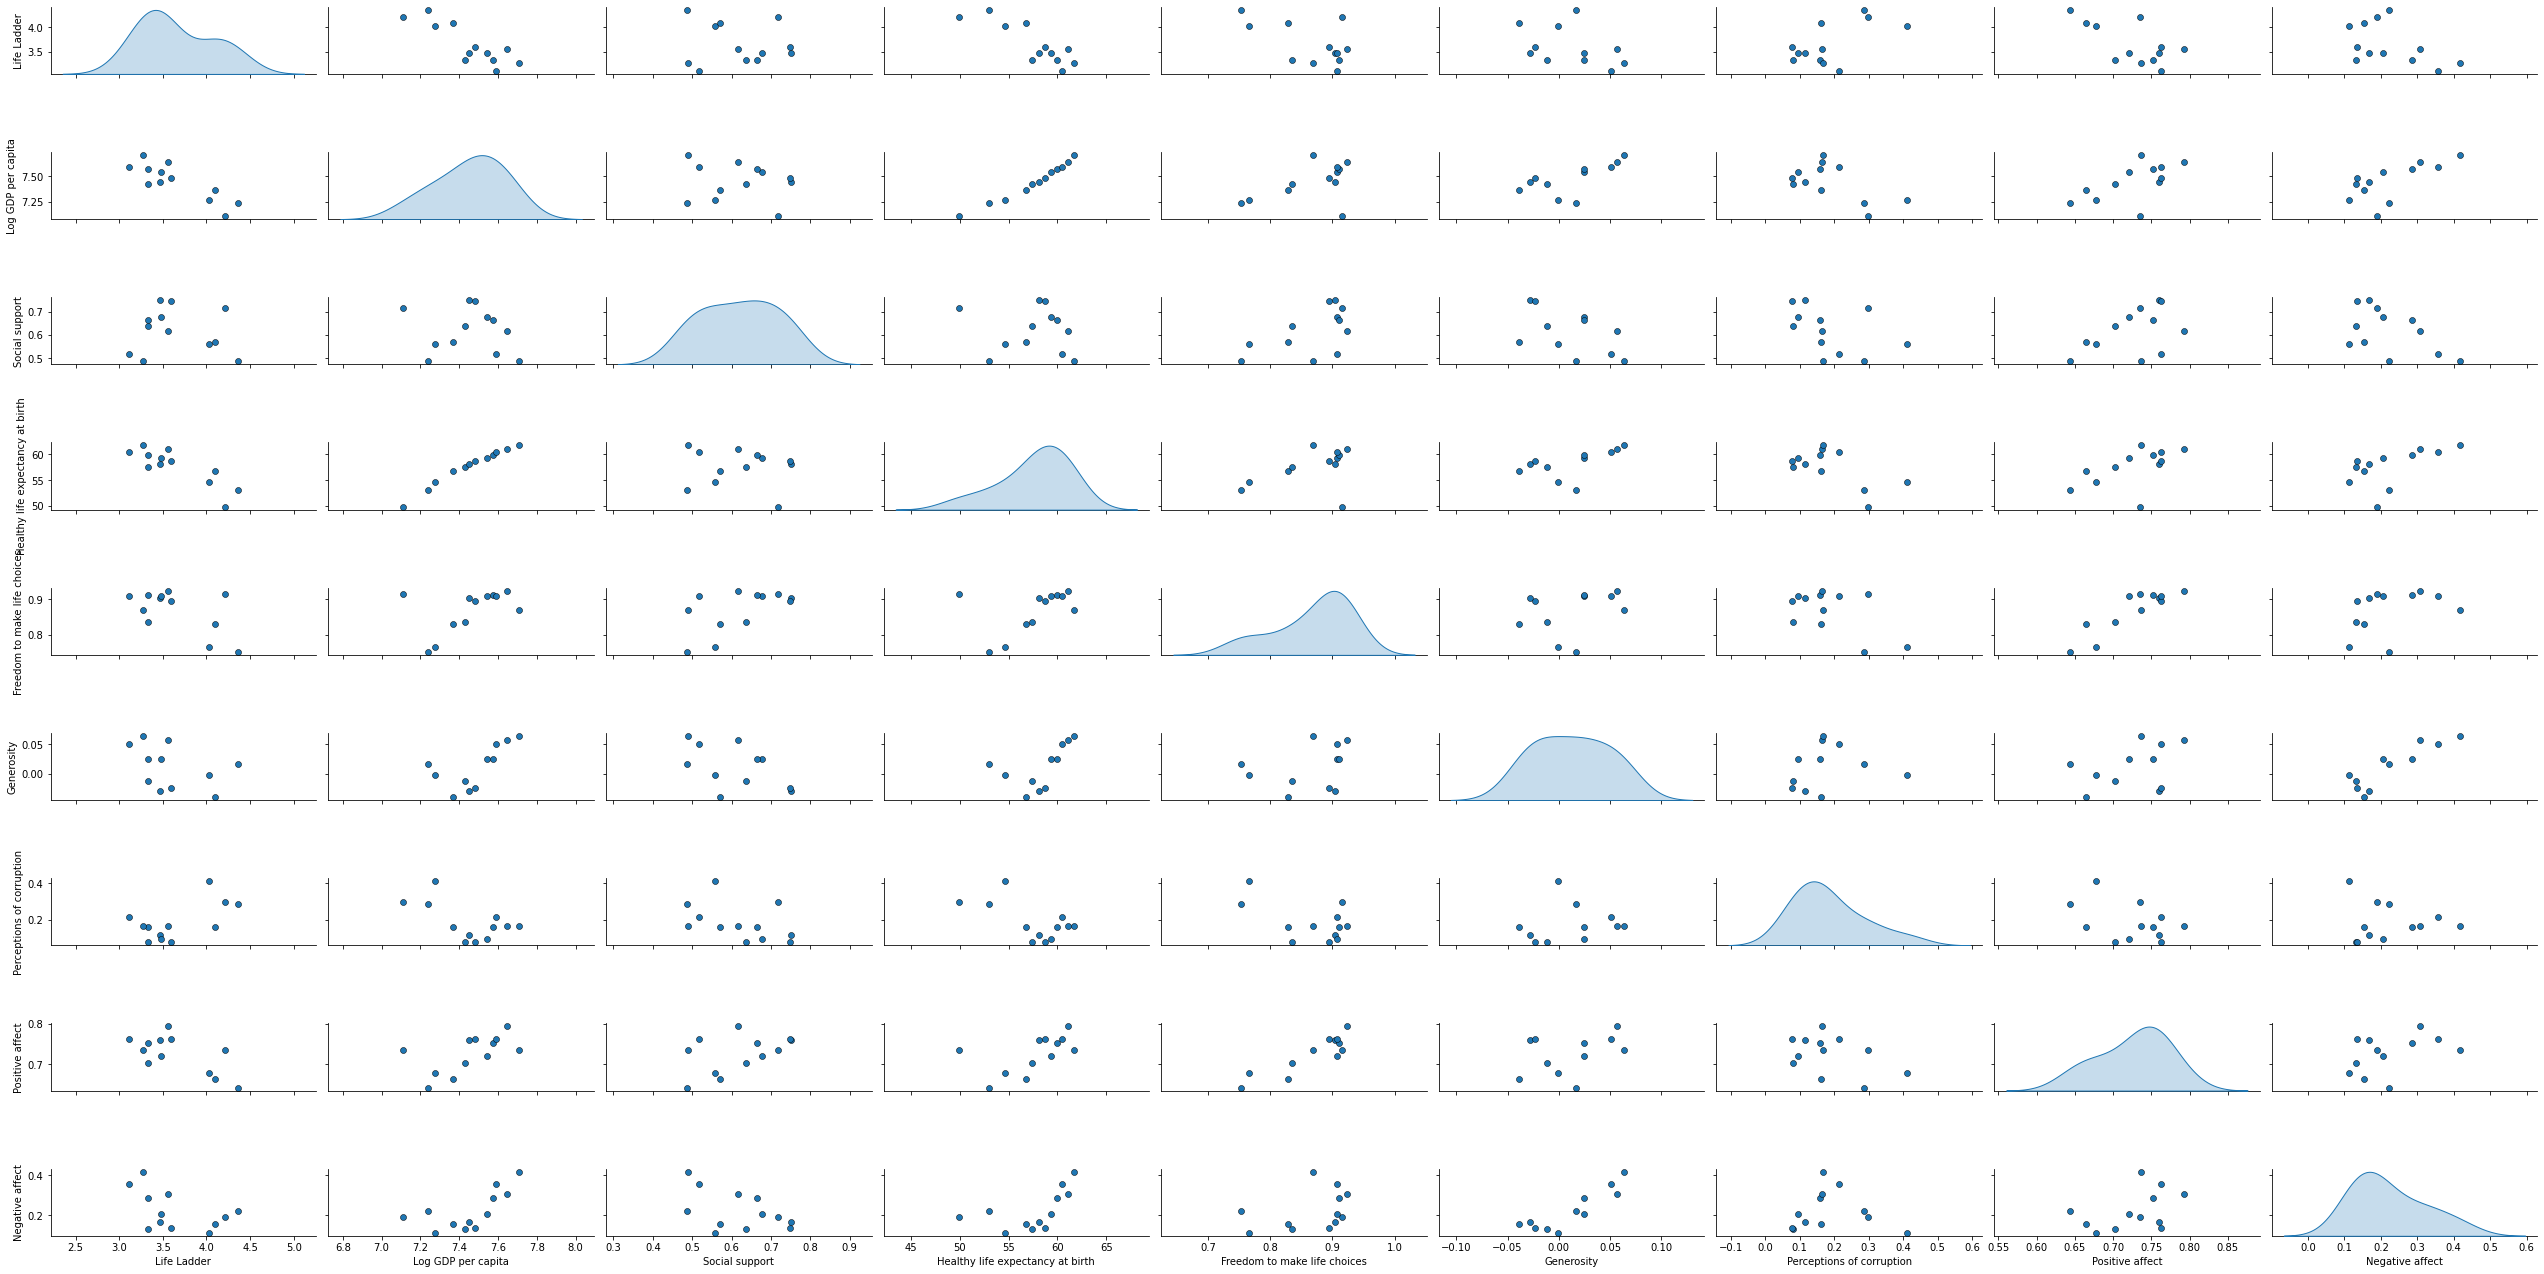

In [ ]:
#Pair plot
ozellikler = ['Life Ladder','Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices','Generosity','Perceptions of corruption','Positive affect','Negative affect']
pp = sns.pairplot(data_rwa[ozellikler], height=2, aspect=2,plot_kws=dict(edgecolor="k", linewidth=0.5),diag_kind="kde", diag_kws=dict(shade=True))

Ruanda için analizler :
1. Korelasyon analizinden Ruanda'da yıllar geçtikçe mutluluk puanının çok güçlü bir negatif korelasyonla değiştiğini görüyoruz.
2. Korelasyon analizinden Ruanda'da mutluluk puanı ile GSYİH arasında çok güçlü bir negatif korelasyon olduğunu görüyoruz.
3. Korelasyon analizinden Ruanda'da mutluluk puanı ile sosyal yardımlar arasında çok düşük düzeyde negatif korelasyon bulunuyor.
4. Korelasyon analizinden Ruanda'da mutluluk puanı ile ortalama sağlıklı yaşam süresi arasında çok güçlü bir negatif korelasyon var.
5. Korelasyon analizinden Ruanda'da mutluluk puanı ile yaşam tarzını belirleme özgürlüğü arasında orta düzeyde negatif korelasyon bulunuyor.
6. Korelasyon analizinden Ruanda'da mutluluk puanı ile cömertlik arasında orta düzeyde negatif korelasyon var.
7. Korelasyon analizinden Ruanda'da mutluluk puanı ile yolsuzluk algıları arasında orta düzeyde bir pozitif korelasyon var.
8. Mutluluk puanı ile negatif ve pozitif etki arasında negatif orta düzeyde bir korelasyon bulunur.

In [ ]:
#Mutluluk puanı yüksek ülkelerle devam edelim
#Finlandiya
data_fin = data2[data2['Country name'].isin(['Finland'])]
data_fin

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
551,Finland,2006,7.672,10.745,0.965,69.76,0.969,-0.005,0.132,0.722,0.172
552,Finland,2008,7.671,10.796,0.951,70.08,0.934,0.028,0.217,0.773,0.144
553,Finland,2010,7.393,10.734,0.935,70.40,0.916,0.091,0.413,0.832,0.202
554,Finland,2011,7.354,10.754,0.938,70.64,0.936,0.101,0.320,0.773,0.205
555,Finland,2012,7.420,10.735,0.928,70.88,0.921,-0.001,0.361,0.796,0.202
556,Finland,2013,7.445,10.722,0.941,71.12,0.919,0.040,0.306,0.769,0.195
557,Finland,2014,7.385,10.714,0.952,71.36,0.933,-0.001,0.265,0.784,0.199
558,Finland,2015,7.448,10.716,0.948,71.60,0.930,0.111,0.223,0.751,0.191
559,Finland,2016,7.660,10.740,0.954,71.70,0.948,-0.027,0.250,0.797,0.182
560,Finland,2017,7.788,10.768,0.964,71.80,0.962,-0.002,0.192,0.787,0.176


In [ ]:
#Korelasyon analizi 
data_fin.corr()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,1.000000,0.522968,0.151965,0.194034,0.989203,0.234056,-0.586088,-0.286441,-0.018448,0.200661
Life Ladder,0.522968,1.000000,0.678255,0.672573,0.453697,0.725275,-0.815189,-0.776776,-0.362032,-0.558631
Log GDP per capita,0.151965,0.678255,1.000000,0.196304,0.064246,0.352047,-0.435829,-0.413962,-0.110523,-0.663722
Social support,0.194034,0.672573,0.196304,1.000000,0.194970,0.758657,-0.502853,-0.807040,-0.426986,-0.482589
Healthy life expectancy at birth,0.989203,0.453697,0.064246,0.194970,1.000000,0.195588,-0.526080,-0.270574,-0.005149,0.218947
Freedom to make life choices,0.234056,0.725275,0.352047,0.758657,0.195588,1.000000,-0.510522,-0.841034,-0.596603,-0.403159
Generosity,-0.586088,-0.815189,-0.435829,-0.502853,-0.526080,-0.510522,1.000000,0.554693,0.219396,0.217666
Perceptions of corruption,-0.286441,-0.776776,-0.413962,-0.807040,-0.270574,-0.841034,0.554693,1.000000,0.774594,0.603610
Positive affect,-0.018448,-0.362032,-0.110523,-0.426986,-0.005149,-0.596603,0.219396,0.774594,1.000000,0.294950
Negative affect,0.200661,-0.558631,-0.663722,-0.482589,0.218947,-0.403159,0.217666,0.603610,0.294950,1.000000


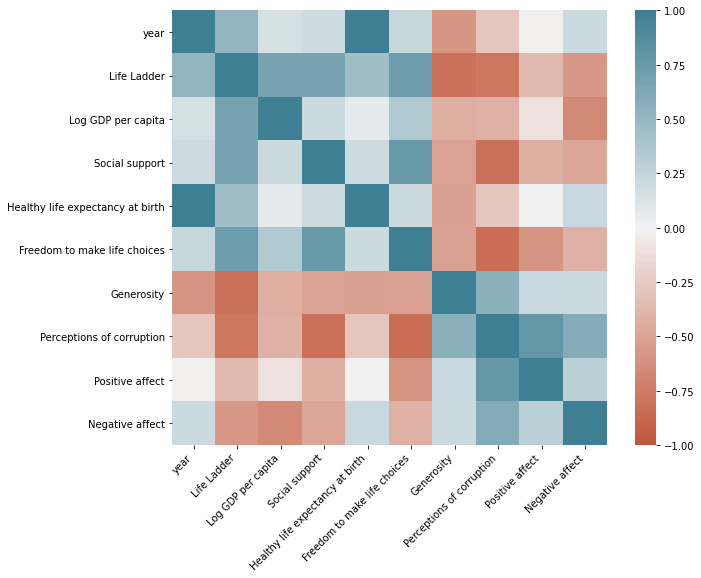

In [ ]:
#Korelasyon grafiği
corr = data_fin.corr()
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');

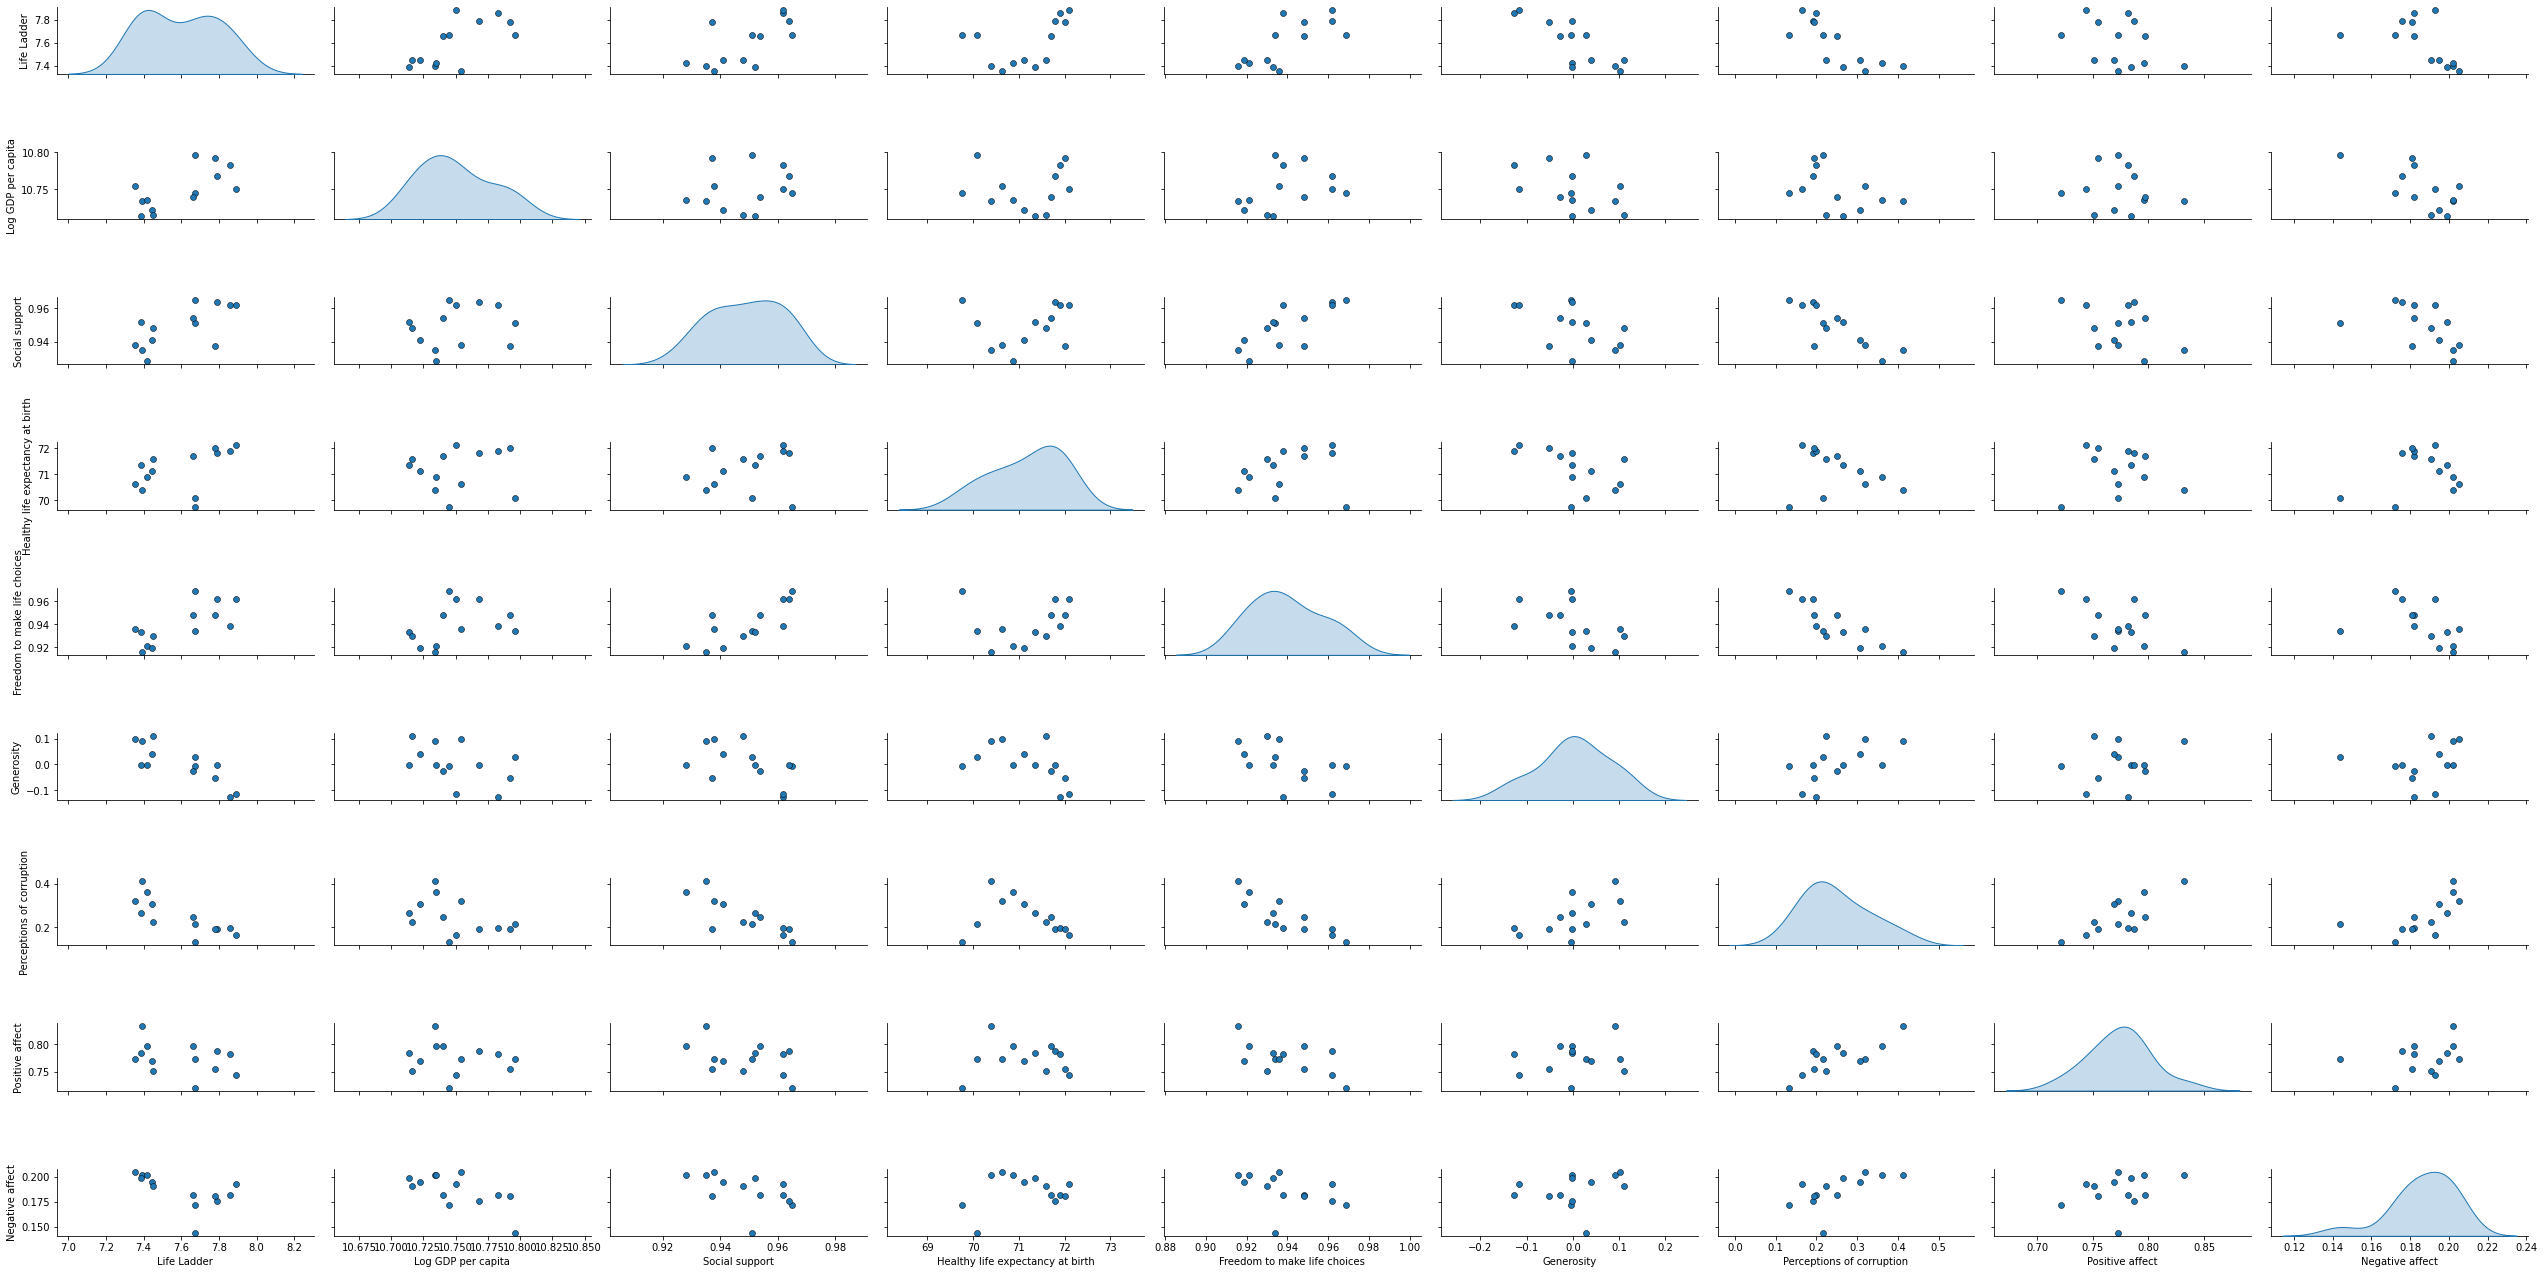

In [ ]:
#Pair plot
ozellikler = ['Life Ladder','Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices','Generosity','Perceptions of corruption','Positive affect','Negative affect']
pp = sns.pairplot(data_fin[ozellikler], height=2, aspect=2,plot_kws=dict(edgecolor="k", linewidth=0.5),diag_kind="kde", diag_kws=dict(shade=True))

Finlandiya için analizler :
1. Korelasyon analizinden Finlanda'da yıllar geçtikçe mutluluk puanının orta düzeyde pozitif korelasyonla değiştiğini görüyoruz.
2. Korelasyon analizinden Finlandiya'da mutluluk puanı ile GSYİH arasında güçlü sayılabilecek bir pozitif korelasyon olduğunu görüyoruz.
3. Korelasyon analizinden Finlandiya'da mutluluk puanı ile sosyal yardımlar arasında güçlü sayılabilecek düzeyde pozitif korelasyon bulunuyor.
4. Korelasyon analizinden Finlandiya'da mutluluk puanı ile ortalama sağlıklı yaşam süresi arasında orta düzeyde pozitif korelasyon var.
5. Korelasyon analizinden Finlanda'da mutluluk puanı ile yaşam tarzını belirleme özgürlüğü arasında güçlü sayılabilecek pozitif korelasyon bulunuyor.
6. Korelasyon analizinden Finlandiya'da mutluluk puanı ile cömertlik arasında çok güçlü negatif korelasyon var.
7. Korelasyon analizinden Finlandiya'da mutluluk puanı ile yolsuzluk algıları arasında çok güçlü sayılabilecek bir pozitif korelasyon var.
8. Mutluluk puanı ile negatif ve pozitif etki arasında negatif orta düzeyde bir korelasyon bulunur.

In [ ]:
#Mutluluk puanı yüksek ülkelerle devam edelim
#Danimarka
data_den = data2[data2['Country name'].isin(['Denmark'])]
data_den

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
449,Denmark,2005,8.019,10.851,0.972,69.60,0.971,NaN,0.237,0.860,0.154
450,Denmark,2007,7.834,10.891,0.954,69.92,0.932,0.240,0.206,0.828,0.194
451,Denmark,2008,7.971,10.880,0.954,70.08,0.970,0.272,0.248,0.757,0.163
452,Denmark,2009,7.683,10.824,0.939,70.24,0.949,0.264,0.206,0.749,0.234
453,Denmark,2010,7.771,10.839,0.975,70.40,0.944,0.242,0.175,0.785,0.155
454,Denmark,2011,7.788,10.848,0.962,70.62,0.935,0.298,0.220,0.769,0.175
455,Denmark,2012,7.520,10.846,0.951,70.84,0.933,0.139,0.187,0.774,0.209
456,Denmark,2013,7.589,10.851,0.965,71.06,0.920,0.215,0.170,0.862,0.195
457,Denmark,2014,7.508,10.862,0.956,71.28,0.942,0.118,0.237,0.832,0.233
458,Denmark,2015,7.514,10.878,0.960,71.50,0.941,0.222,0.191,0.829,0.218


In [ ]:
#Korelasyon analizi 
data_den.corr()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,1.000000,-0.739339,0.706337,-0.266280,0.992358,-0.202109,-0.849673,-0.486761,0.334982,0.495027
Life Ladder,-0.739339,1.000000,-0.176004,0.388109,-0.676492,0.555961,0.518893,0.407810,-0.157972,-0.807586
Log GDP per capita,0.706337,-0.176004,1.000000,-0.162993,0.758675,0.185060,-0.745013,-0.330021,0.476373,0.092644
Social support,-0.266280,0.388109,-0.162993,1.000000,-0.270408,0.051672,0.149704,-0.123515,0.371349,-0.738802
Healthy life expectancy at birth,0.992358,-0.676492,0.758675,-0.270408,1.000000,-0.141907,-0.868581,-0.462691,0.369657,0.461376
Freedom to make life choices,-0.202109,0.555961,0.185060,0.051672,-0.141907,1.000000,-0.044724,0.442334,-0.012159,-0.418019
Generosity,-0.849673,0.518893,-0.745013,0.149704,-0.868581,-0.044724,1.000000,0.391385,-0.555478,-0.341393
Perceptions of corruption,-0.486761,0.407810,-0.330021,-0.123515,-0.462691,0.442334,0.391385,1.000000,-0.229177,-0.098286
Positive affect,0.334982,-0.157972,0.476373,0.371349,0.369657,-0.012159,-0.555478,-0.229177,1.000000,-0.010205
Negative affect,0.495027,-0.807586,0.092644,-0.738802,0.461376,-0.418019,-0.341393,-0.098286,-0.010205,1.000000


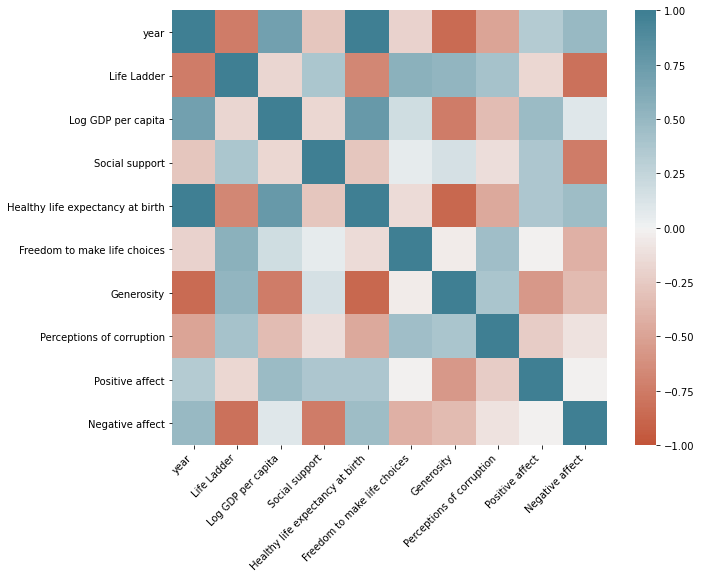

In [ ]:
#Korelasyon grafiği
corr = data_den.corr()
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');

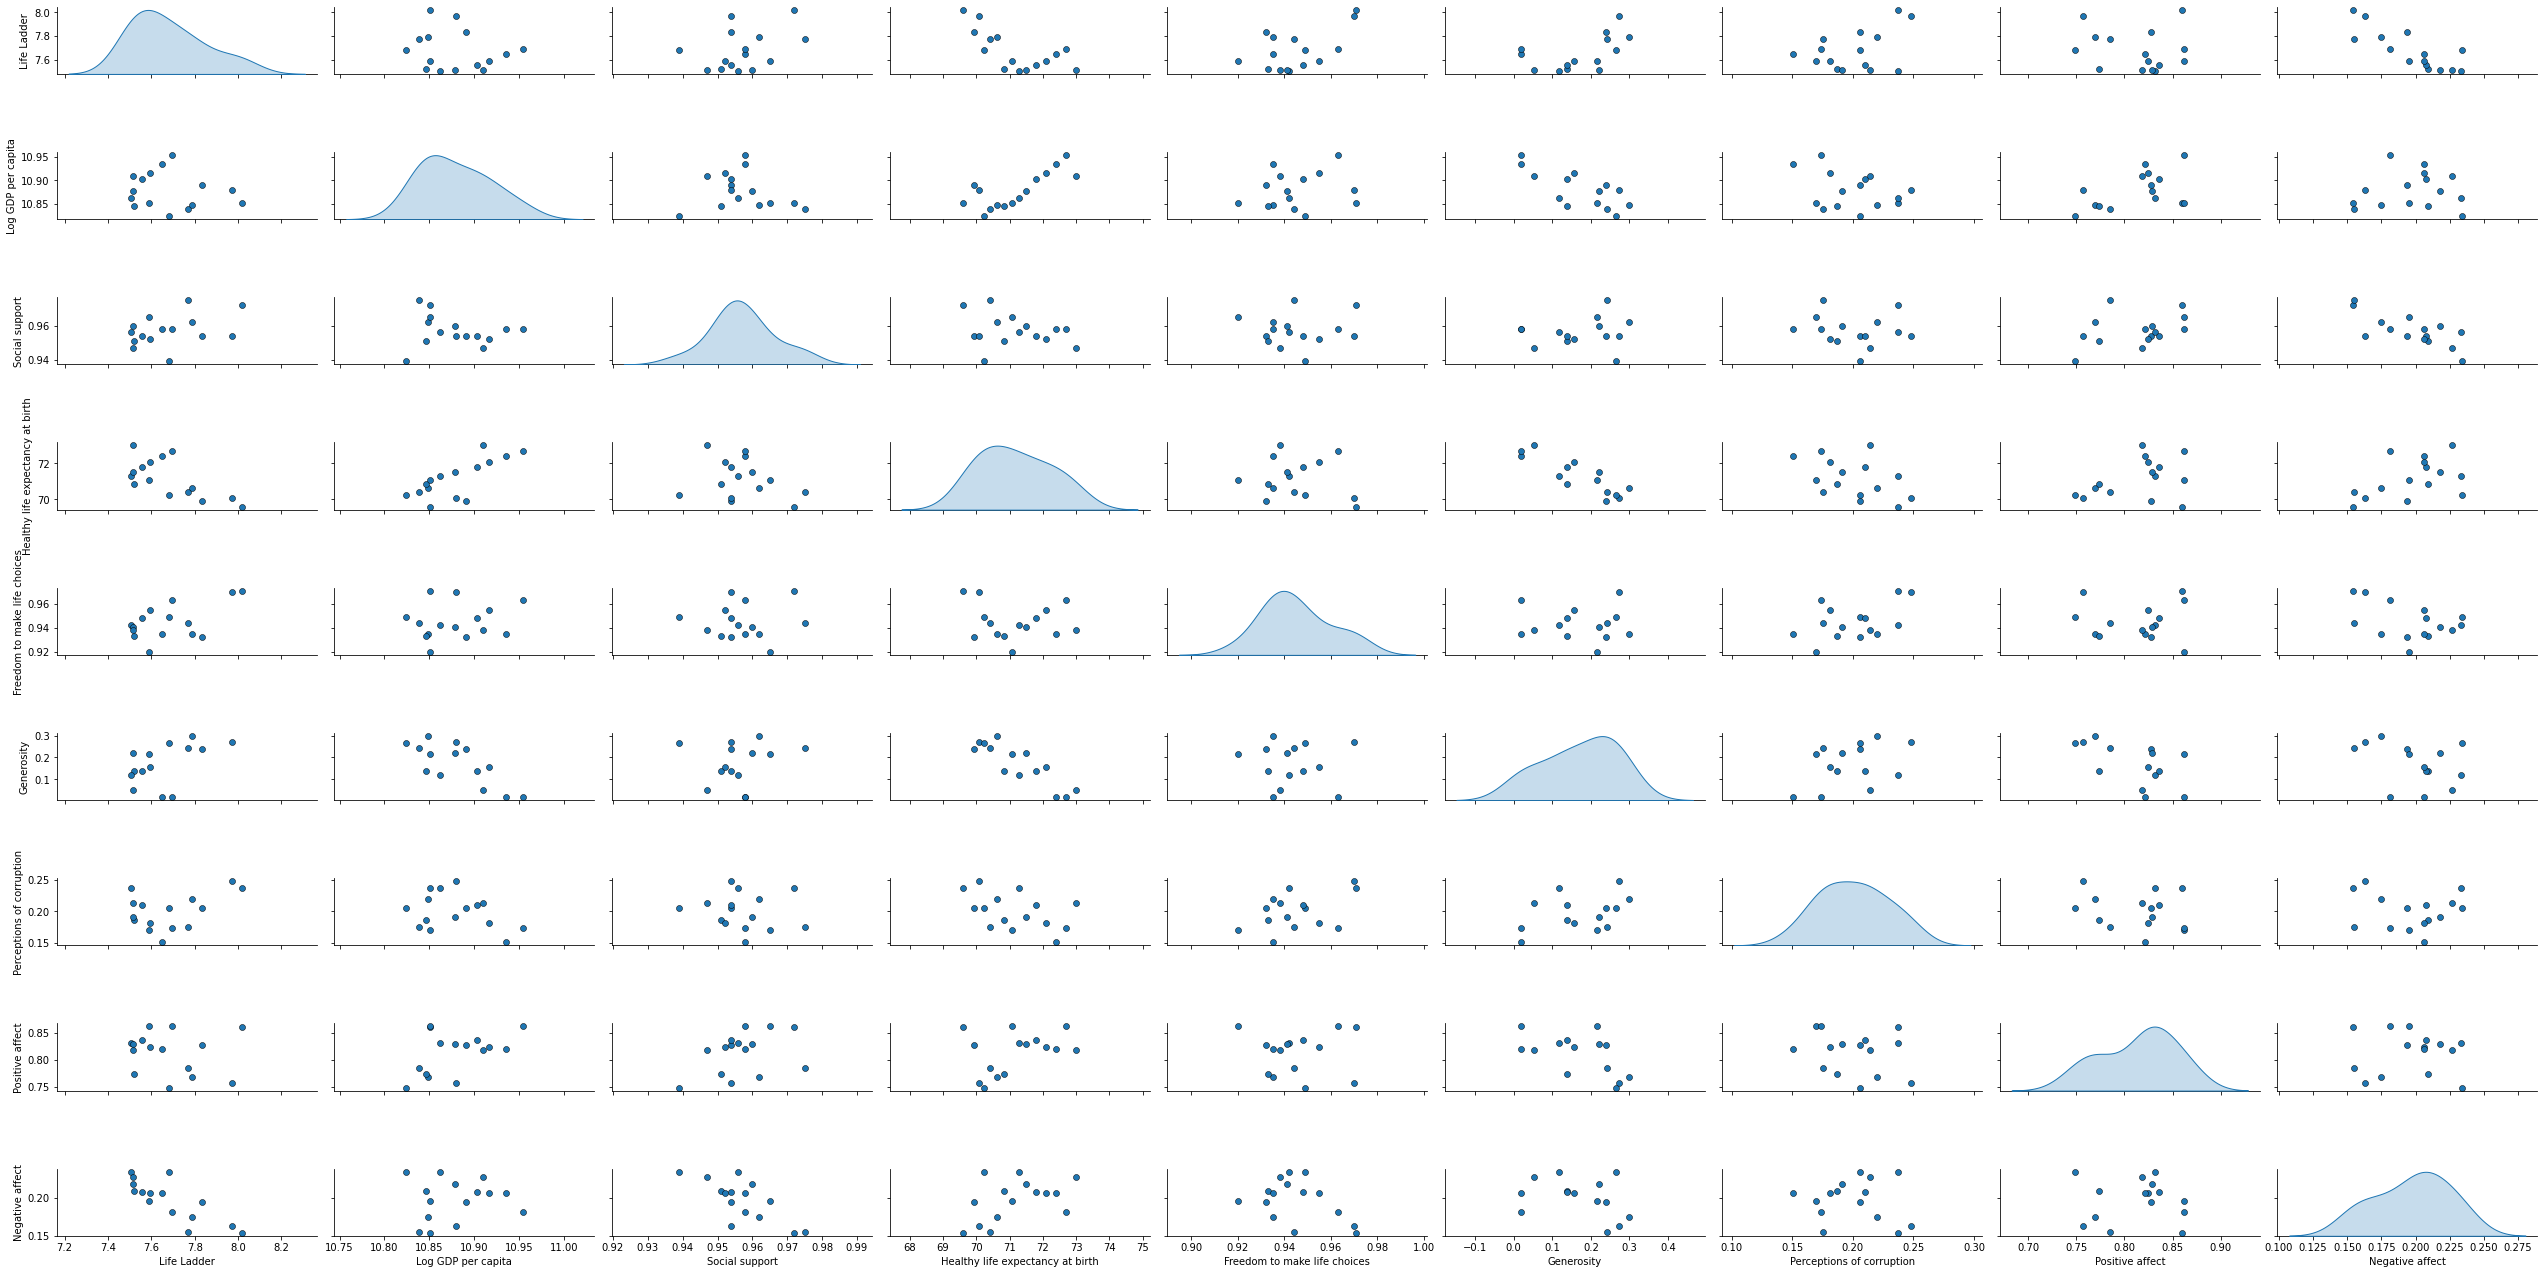

In [ ]:
#Pair plot
ozellikler = ['Life Ladder','Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices','Generosity','Perceptions of corruption','Positive affect','Negative affect']
pp = sns.pairplot(data_den[ozellikler], height=2, aspect=2,plot_kws=dict(edgecolor="k", linewidth=0.5),diag_kind="kde", diag_kws=dict(shade=True))

Danimarka için analizler :
1. Korelasyon analizinden Danimarka'da yıllar geçtikçe mutluluk puanının güçlü pozitif korelasyonla değiştiğini görüyoruz.
2. Korelasyon analizinden Danimarka'da mutluluk puanı ile GSYİH arasında zayıf bir negatif korelasyon olduğunu görüyoruz.
3. Korelasyon analizinden Danimarka'da mutluluk puanı ile sosyal yardımlar arasında orta düzeyde pozitif korelasyon bulunuyor.
4. Korelasyon analizinden Finlandiya'da mutluluk puanı ile ortalama sağlıklı yaşam süresi arasında güçlü sayılabilcek düzeyde  negatif korelasyon var.
5. Korelasyon analizinden Danimarka'da mutluluk puanı ile yaşam tarzını belirleme özgürlüğü arasında orta düzeyde pozitif korelasyon bulunuyor.
6. Korelasyon analizinden Danimarka'da mutluluk puanı ile cömertlik arasında orta düzeyli pozitif korelasyon var.
7. Korelasyon analizinden Danimarka'da mutluluk puanı ile yolsuzluk algıları arasında orta düzeyde sayılabilecek bir pozitif korelasyon var.
8. Mutluluk puanı ile negatif etki arasında çok güçlü,pozitif etki arasında çok zayıf negatif korelasyon var.

In [ ]:
#Mutluluk puanı yüksek ülkelerle devam edelim
#İsviçre
data_swi = data2[data2['Country name'].isin(['Switzerland'])]
data_swi

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1652,Switzerland,2006,7.473,11.050,0.951,71.54,0.919,0.290,0.408,0.821,0.212
1653,Switzerland,2009,7.525,11.055,0.938,72.26,0.891,0.125,0.342,0.814,0.202
1654,Switzerland,2012,7.776,11.079,0.947,72.78,0.945,0.139,0.323,0.859,0.176
1655,Switzerland,2014,7.493,11.098,0.959,73.06,0.949,0.060,0.283,0.823,0.189
1656,Switzerland,2015,7.572,11.100,0.938,73.20,0.928,0.109,0.210,0.809,0.166
1657,Switzerland,2016,7.459,11.106,0.928,73.50,0.934,0.088,0.302,0.779,0.206
1658,Switzerland,2017,7.474,11.115,0.950,73.80,0.925,0.180,0.316,0.774,0.196
1659,Switzerland,2018,7.509,11.134,0.930,74.10,0.926,0.101,0.301,0.792,0.192
1660,Switzerland,2019,7.694,11.136,0.949,74.40,0.913,0.036,0.294,0.798,0.171
1661,Switzerland,2020,7.508,11.081,0.946,74.70,0.917,-0.064,0.280,0.769,0.193


In [ ]:
#Korelasyon analizi 
data_swi.corr()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,1.000000,0.050776,0.802233,-0.173120,0.990223,0.145128,-0.760765,-0.661954,-0.651464,-0.414079
Life Ladder,0.050776,1.000000,0.113398,0.161684,0.072010,0.145046,-0.127993,-0.137612,0.600620,-0.730655
Log GDP per capita,0.802233,0.113398,1.000000,-0.203524,0.757506,0.263075,-0.370242,-0.526353,-0.421648,-0.451731
Social support,-0.173120,0.161684,-0.203524,1.000000,-0.157187,0.224423,0.082862,0.193857,0.316583,-0.124383
Healthy life expectancy at birth,0.990223,0.072010,0.757506,-0.157187,1.000000,0.053282,-0.780729,-0.588430,-0.661175,-0.377090
Freedom to make life choices,0.145128,0.145046,0.263075,0.224423,0.053282,1.000000,-0.010939,-0.270720,0.305219,-0.250348
Generosity,-0.760765,-0.127993,-0.370242,0.082862,-0.780729,-0.010939,1.000000,0.642796,0.392366,0.376682
Perceptions of corruption,-0.661954,-0.137612,-0.526353,0.193857,-0.588430,-0.270720,0.642796,1.000000,0.239013,0.715767
Positive affect,-0.651464,0.600620,-0.421648,0.316583,-0.661175,0.305219,0.392366,0.239013,1.000000,-0.270703
Negative affect,-0.414079,-0.730655,-0.451731,-0.124383,-0.377090,-0.250348,0.376682,0.715767,-0.270703,1.000000


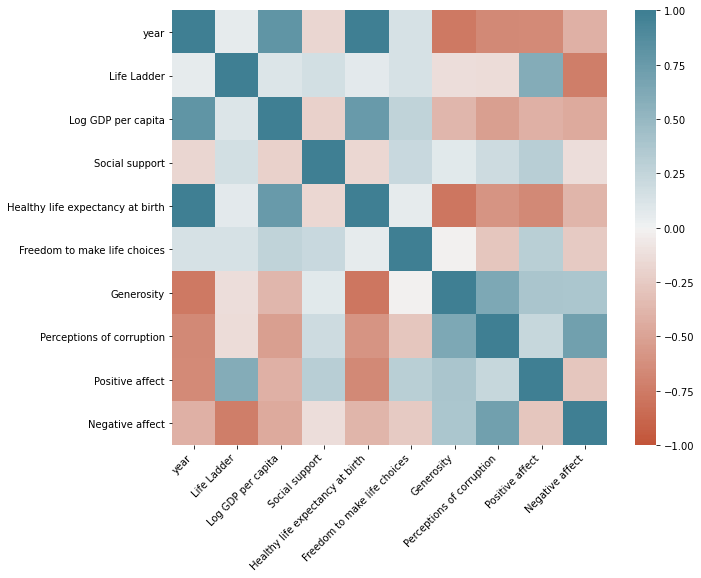

In [ ]:
#Korelasyon grafiği
corr = data_swi.corr()
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');

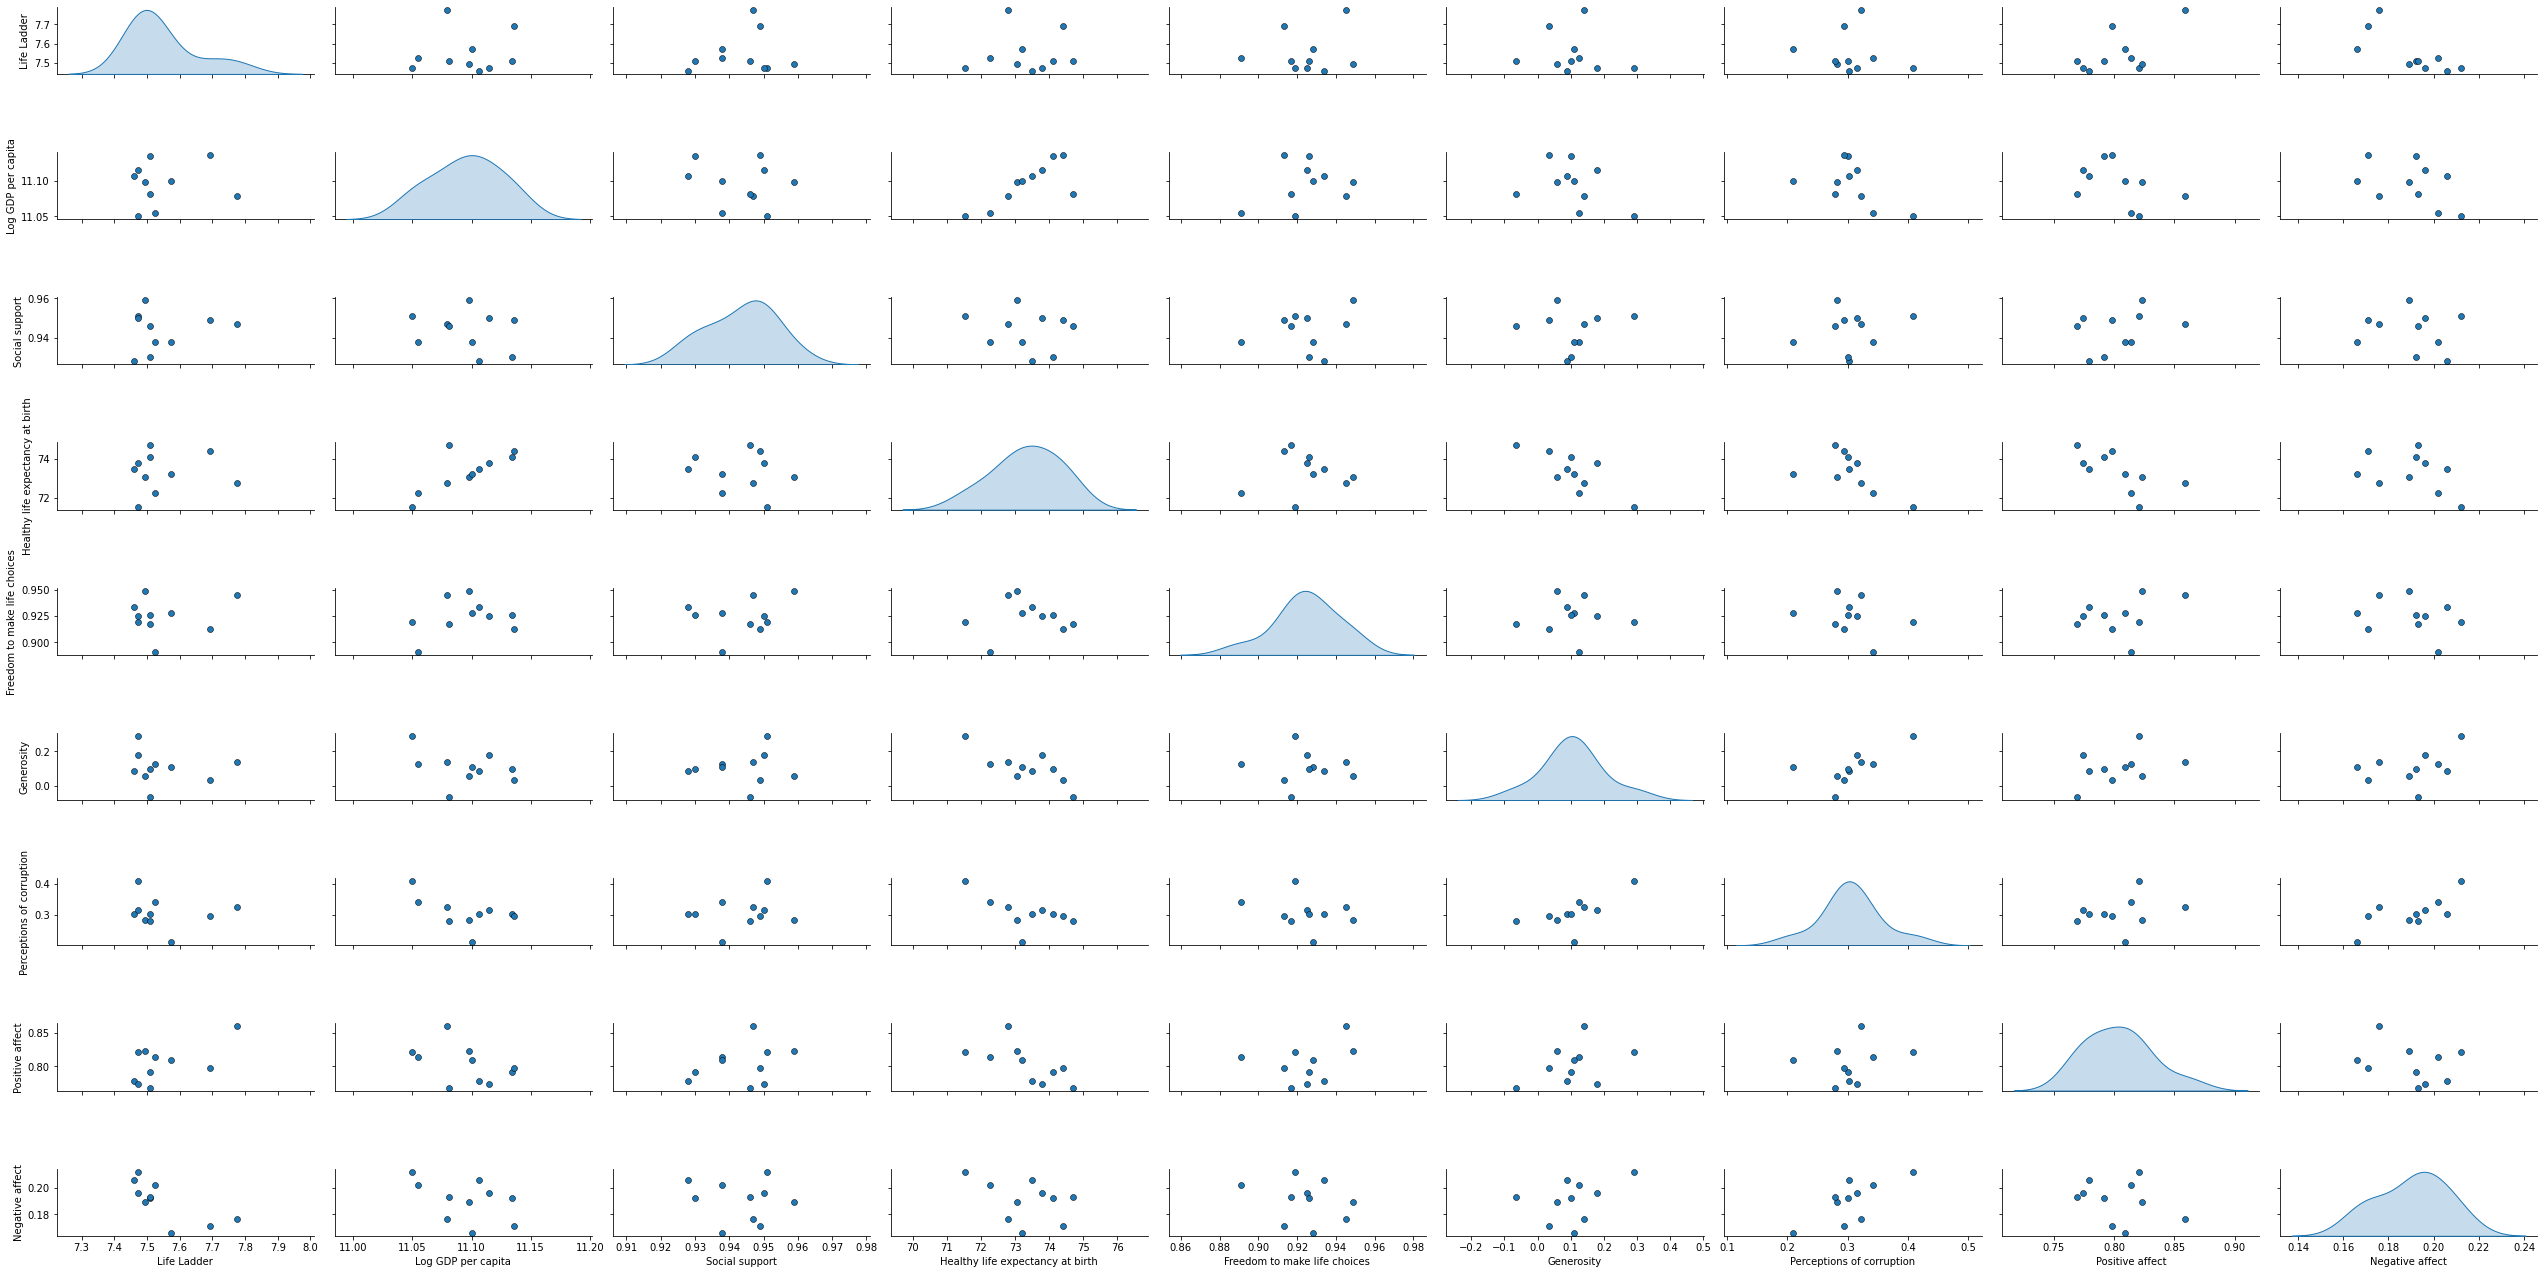

In [ ]:
#Pair plot
ozellikler = ['Life Ladder','Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices','Generosity','Perceptions of corruption','Positive affect','Negative affect']
pp = sns.pairplot(data_swi[ozellikler], height=2, aspect=2,plot_kws=dict(edgecolor="k", linewidth=0.5),diag_kind="kde", diag_kws=dict(shade=True))

İsviçre için analizler :
1. Korelasyon analizinden İsviçre'de mutluluk puanını yıllarla ilişkisizdir.
2. Korelasyon analizinden İsviçre'de mutluluk puanı ile GSYİH arasında yok denecek kadar az bir pozitif korelasyon vardır.
3. Korelasyon analizinden İsviçre'de mutluluk puanı ile sosyal yardımlar arasında çok zayıf pozitif korelasyon bulunuyor.
4. Korelasyon analizinden İsviçre'de mutluluk puanı ile ortalama sağlıklı yaşam süresi arasında bir ilişki yoktur.
5. Korelasyon analizinden İsviçre'de mutluluk puanı ile yaşam tarzını belirleme özgürlüğü arasında çok zayıf düzeyde pozitif korelasyon bulunuyor.
6. Korelasyon analizinden İsviçre'de mutluluk puanı ile cömertlik arasında çok zayıf bir negatif korelasyon var.
7. Korelasyon analizinden İsviçre'de mutluluk puanı ile yolsuzluk algıları arasında çok zayıf düzeyde bir negatif korelasyon var.
8. Mutluluk puanı ile negatif etki arasında çok güçlü negatif,pozitif etki ile arasında güçlü pozitif korelasyon var.